# Visualization Goals
Essentially, there are three goals to visualization:

* **Data Exploration** — find the unknown
* **Data Analysis** — check hypotheses
* **Presentation** — communicate and disseminate

# Install Matplotlib
using conda

In [ ]:
!conda install matplotlib

using pip

In [ ]:
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Disable warning
import warnings
warnings.filterwarnings("ignore")

## Prepare the data

In [158]:
# 1D data
x = np.linspace(0, 10, 100)
y = np.cos(x)
z = np.sin(x)

# 2D data
data = 2 * np.random.random((10, 10))
data2 = 3 * np.random.random((10, 10))
Y,X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2

from matplotlib.cbook import get_sample_data
#img = np.load(get_sample_data('axes_grid\\bivariate_normal.npy'))

# Two Approaches for creating Plots - Object-Oriented API vs Pyplot
[Reference](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)

Matplotlib has two interfaces. 
1. The first is an object-oriented (OO) interface. In this case, we utilize an instance of axes.Axes in order to render visualizations on an instance of figure.Figure.
2. The second is based on MATLAB and uses a state-based interface. This is encapsulated in the pyplot module. See the pyplot tutorials for a more in-depth look at the pyplot interface.

Most of the terms are straightforward but the main thing to remember is that:

* The Figure is the final image that may contain 1 or more Axes.
* The Axes represent an individual plot (don't confuse this with the word "axis", which refers to the x/y axis of a plot).

We call methods that do the plotting directly from the Axes, which gives us much more flexibility and power in customizing our plot.

Note

In general, try to use the object-oriented interface over the pyplot interface.

### Functional Approach: Pyplot interface
This is a MATLAB-user-friendly style in which everything is done with plt.***.

Let’s plot an example using two Numpy arrays `x` and `y` 

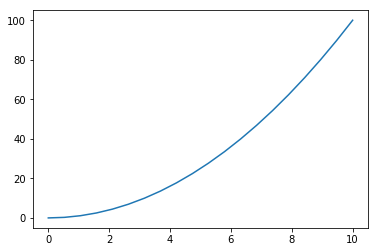

In [3]:
x = np.linspace(0, 10, 20)
y = x**2

plt.plot(x, y)

Now that we have a plot, let’s go on to name the `x-axis`, `y-axis`, and add a title using `.xlabel()`, `.ylabel()` and `.title()` using:

Text(0, 0.5, 'Y Label')

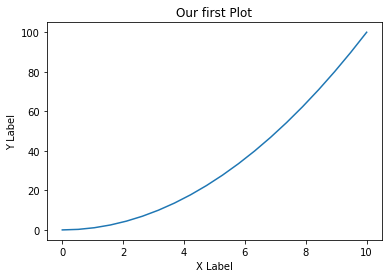

In [4]:
plt.plot(x, y)
plt.title('Our first Plot')
plt.xlabel('X Label')
plt.ylabel('Y Label')

Imagine we needed more than one plot on that canvas. Matplotlib allows us easily create multi-plots on the same figure using the `.subplot()` method. This `.subplot()` method takes in three parameters, namely:

* `nrows`: the number of rows the Figure should have.
* `ncols`: the number of columns the Figure should have.
* `plot_number` : which refers to a specific plot in the Figure.

Using `.subplot()` we will create a two plots on the same canvas:

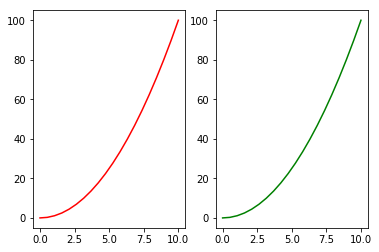

In [5]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'red')

plt.subplot(1, 2, 2)
plt.plot(x, y, 'green')

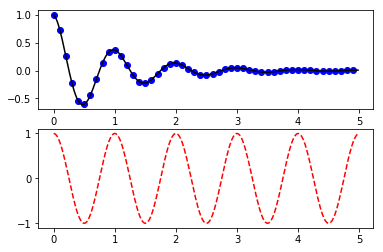

In [6]:
# https://matplotlib.org/tutorials/introductory/pyplot.html
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

At first, it seems very simple because there is no need to think about which objects you are handling. You only need to know which "state" you are in, which is why this style is also called "stateful interface". Here, a "state" means which figure and subplot you are currently in. As you see in Pyplot tutorial, it gives a nice figure if your plot is not so complicated. Although Pyplot interface offers lots of functions to change plot settings, you may reach its limit within a couple of hours, days, months (or never if you are lucky enough) depending on what you want to do. At this stage, you need to switch to OO interface. That is why I recommend to use OO interface from the beginning. But Pyplot is still useful for quick checks or any occasions where you need rough plots.

### Object-oriented API interface
This is the recommended style which often starts with `fig, ax = plt.subplots()` or other equivalents followed by `ax.plot`, `ax.imshow` etc. `fig` and `ax` are, in fact, `Artists`. Here are some simplest examples.

1. The idea here is to create `Figure` objects and call methods off it. Let’s create a blank `Figure` using the `.figure()` method.
2. we need to add a set of axes to it using the `.add_axes()` method. The `add_axes()` method takes in a list of four arguments (left, bottom, width, and height — which are the positions where the axes should be placed) ranging from 0 to 1.
3. Now we have a blank set of axes. Now let’s plot our `x` and `y` arrays on it:

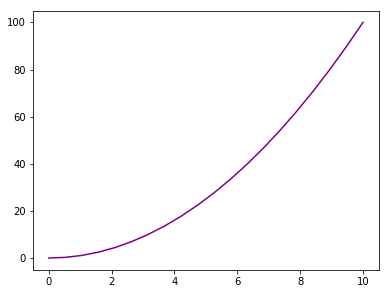

In [14]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.8, 0.9])
ax.plot(x, y, 'purple')

We can further add x and y labels and a title to our plot same way we did in the Function approach, but there’s a slight difference here. Using `.set_xlabel()`, `.set_ylabel()` and `.set_title()` let us go ahead and add labels and a title to our plot:

Text(0.5, 1.0, 'Our First Plot using Object Oriented Approach')

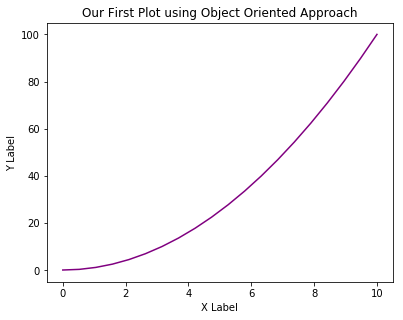

In [15]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.8, 0.9])
ax.plot(x, y, 'purple')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Our First Plot using Object Oriented Approach')

we noted that a Figure can contain multiple figures. Let’s try to put in two sets of figures on one canvas:

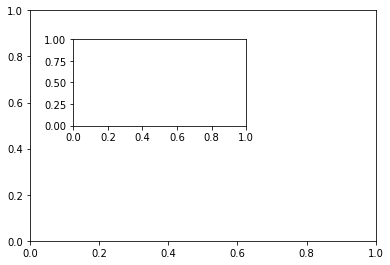

In [16]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

Now let’s plot our x and y arrays on the axes we have created:

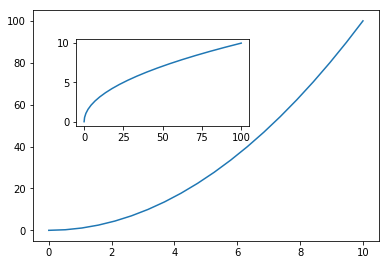

In [18]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

axes1.plot(x, y)
axes2.plot(y, x)

Like we did in the functional approach, we can also create multiple plots in the object-oriented approach using the `.subplots()` method, and NOT `.subplot()`. The `.subplots()` method takes in nrows, which is the number of rows the Figure should have, and ncols, the number of columns the Figure should have.

For example, we can create a 3 by 3 subplots like this:

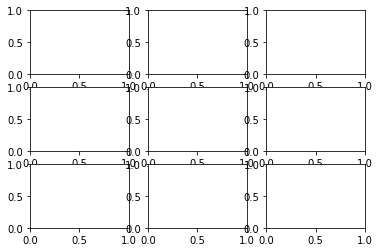

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3)

What we have just done is that we used tuple unpacking to grab the axes from the Figure object which gave us a 3X3 subplots. As we see, there is an issue of overlapping in the subplots we created. We can deal with that by using `.tight_layout()` method to space it out:

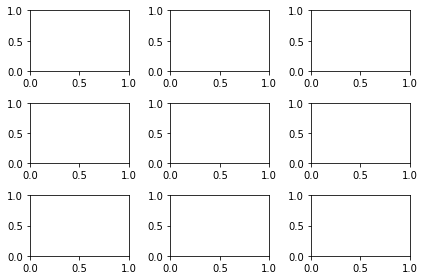

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3)
plt.tight_layout()

The only difference between `plt.figure()` and `plt.subplots()` is that `plt.subplots()` automatically does what the `.add_axes()` method of `.figure()` will do for you based off the number of rows and columns you specify.

Now that we know how to create subplots, let’s see how we can plot our x and y arrays on them. We want to plot x, y on the axes at index position (0,1) and y, x on the axes at position (1,2) respectively:

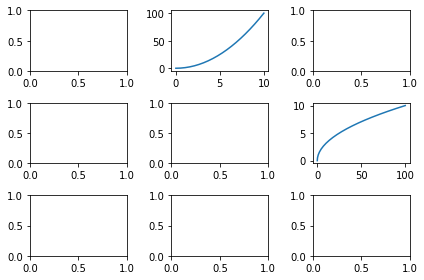

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=3)

ax[0, 1].plot(x, y)
ax[1, 2].plot(y, x)

plt.tight_layout()

Other examples

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)

Some tutorials use `fig = plt.gcf()` and `ax = plt.gca()`. These should be used when you switch from Pyplot interface to OO interface, but some Pyplot-based codes include, for example, pointless ax = plt.gca() which is apparently copied from OO-based code without understanding. Using `plt.gcf()` or `plt.gca()` isn't a bad thing at all if one switch the interface intentionally. Considering implicit switching can be a cause of confusion for beginners, using plt.subplots or `fig.add_subplot` from the beginning would be the best practice for most of the cases if they are publicly available.

# The hierarchy in matplotlib - `Artist` in Matplotlib

There are two key components in a Plot; namely, Figure and Axes.

<img src="../image/Figure_Axes.PNG" alt="Alt text that describes the graphic" title="Title text" />

<img src="../image/anatomy_matplotlib.png" alt="Alt text that describes the graphic" title="Title text" />

The `Figure` is the top-level container that acts as the window or page on which everything is drawn. It can contain multiple independent figures, multiple Axes, a subtitle (which is a centered title for the figure), a legend, a color bar, etc.

The `Axes` is the area on which we plot our data and any labels/ticks associated with it. Each `Axes` has an `X-Axis` and a `Y-Axis` (like in the image above). Let’s go ahead to making plots.

**Everything in your plot is an Artist**

Instead of a figure explaining the hierarchical structure, [Usage Guide](https://matplotlib.org/tutorials/introductory/usage.html) in the current doc has "Anatomy of a figure" explaining all components in a figure which is also informative.

From lines and points which represent data to minor ticks and text labels for them on X axis, every single component in a figure is an Artist object4. There are two types of Artist, containers and primitives. As I wrote in the previous section, three components in matplotlib's hierarchy, Figure, Axes, and Axis are containers which can contain lower containers and multiple primitives such as Line2D made by ax.plot, PathCollection by ax.scatter, or Text by ax.annotate. Even tick lines and labels are in fact Line2D and Text which belong to the fourth container Tick.

Containers have many "boxes" (Python lists, technicaly) for each type of primitives. For example, an Axes object, ax, just after instantation has an empty list ax.lines. Frequently-used command ax.plot adds a Line2D object in the list and does other accompanying settings silently.

In [ ]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
print('ax.lines before plot:\n', ax.lines) # empty
line1, = ax.plot(x, np.sin(x), label='1st plot') # add Line2D in ax.lines
print('ax.lines after 1st plot:\n', ax.lines)
line2, = ax.plot(x, np.sin(x+np.pi/8), label='2nd plot') # add another Line2D
print('ax.lines after 2nd plot:\n', ax.lines)
ax.legend()
print('line1:', line1)
print('line2:', line2)

**containers objects: Figure - Axes - Axis**

Actually, these three components are special Artists called "containers" (and there is the fourth container Tick) which we will see later. This hierarchy makes simple examples above even clearer.

In [ ]:
fig, ax = plt.subplots() # make Figure and Axes which belongs to 'fig'

In [ ]:
fig = plt.figure() # make Figure
ax = fig.add_subplot(1,1,1) # make Axes belonging to fig

Taking a further look at attributes of fig and ax helps you understand the hierarchy more.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # make a blank plotting area
print('fig.axes:', fig.axes)
print('ax.figure:', ax.figure)
print('ax.xaxis:', ax.xaxis)
print('ax.yaxis:', ax.yaxis)
print('ax.xaxis.axes:', ax.xaxis.axes)
print('ax.yaxis.axes:', ax.yaxis.axes)
print('ax.xaxis.figure:', ax.xaxis.figure)
print('ax.yaxis.figure:', ax.yaxis.figure)
#print('fig.xaxis:', fig.xaxis)

From these results, we can expect following rules about the hierarchy of Figure, Axes, and Axis.

* Figure knows Axes but not Axis.
* Axes knows Figure and Axis both.
* Axis knows Axes and Figure both.
* Figure can contain multiple Axes because fig.axes is a list of Axes.
* Axes can belong to only single Figure because ax.figure is not a list.
* Axes can have one XAxis and YAxis respectively for similar reason.
* XAxis and YAxis can belong to single Axes and, accordingly, single Figure.

## Figure
In Matplotlib everything is made of objects. There is an object called `Figure`, and one called `Axes`. There are objects called `Line2D`, `Patch`, `Text`, `Artist`, and many others. Some objects are children of others, and members of yet others. It can get hard to keep track of which objects do what.

The most useful relationship to understand is that `Figure` objects contain `Axes` objects. A `Figure` is just what it sounds like, a rectangular blank canvas on which a plot is constructed. `Axes` objects are where all the plotting action happens. You can have more than one `Axes` in a `Figure`, and you can place them wherever you want.

|Figure attributes|description|
|-----------------|-----------|
|fig.axes|A list of Axes instances (includes Subplot)|
|fig.patch|The Rectangle background|
|fig.images|A list of FigureImages patches - useful for raw pixel display|
|fig.legends|A list of Figure Legend instances (different from Axes.legends)|
|fig.lines|A list of Figure Line2D instances (rarely used, see Axes.lines)|
|fig.patches|A list of Figure patches (rarely used, see Axes.patches)|
|fig.texts|A list Figure Text instances|

### fig.legend and ax.legend
fig.legends is a "box" for legends added by fig.lenged method. You may think "What's that for? We have ax.legend." The difference is a scope of each method. While ax.legend only collects labels from Artists belonging to ax, fig.legend gathers labels from all Axes under fig. This is useful, for instance, when you make a plot using ax.twinx. Simply using ax.legend twice makes two legends, which is not desirable in general.

In [ ]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), label='sin(x)')
ax1 = ax.twinx()
ax1.plot(x, 2*np.cos(x), c='C1', label='2*cos(x)') 
# cf. 'CN' notation
# https://matplotlib.org/tutorials/colors/colors.html#cn-color-selection

ax.legend()
ax1.legend()

A famous recipe to put them together is to combine legend handlers and labels of both Axes.

In [ ]:
# Executing this part in a different notebook cell shows an updated figure.
handler, label = ax.get_legend_handles_labels()
handler1, label1 = ax1.get_legend_handles_labels()
ax.legend(handler+handler1, label+label1, loc='upper center', title='ax.legend')
# Legend made by ax1.legend remains
fig

This can be easily done by fig.legend without arguments which was introduced in ver 2.15. By default, the position is specified with Figure coordinate which is not useful when you want to put it in a plotting frame. You can change it to Axes coordinate with bbox_transform keyword.

In [ ]:
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes, title='fig.legend\nax.transAxes')
fig

### Save a figure
We can use Matplotlib to generate high quality figures and save them in a number of formats, such as png, jpg, svg, pdf, etc. Using the `.savefig()` method, we’ll save the above figure in a file named **my_figure.png**:

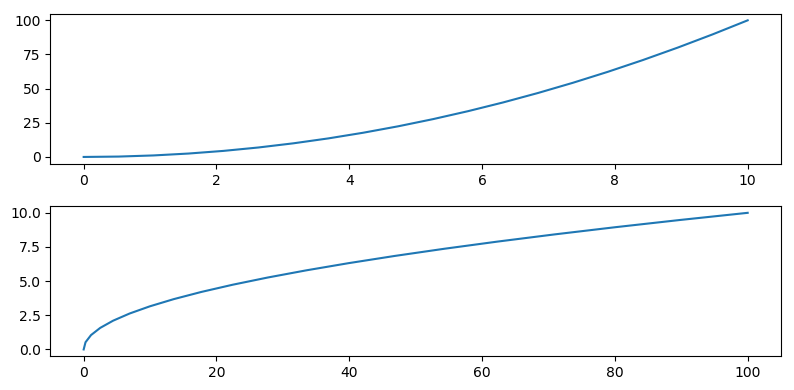

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 4), dpi=100)

ax[0].plot(x, y)
ax[1].plot(y, x)

plt.tight_layout()

fig.savefig('my_figure.png')

## Axes
The matplotlib.axes.Axes is the center of the matplotlib universe
This is a quote from Artist tutorial. This is very true because important parts of data visualization in matplotlib all come from Axes methods.

|Axes attributes|	description|
|---------------|--------------|
|ax.artists	|A list of Artist instances|
|ax.patch	|Rectangle instance for Axes background|
|ax.collections	|A list of Collection instances|
|ax.images	|A list of AxesImage|
|ax.legends	|A list of Legend instances|
|ax.lines	|A list of Line2D instances|
|ax.patches	|A list of Patch instances|
|ax.texts	|A list of Text instances|
|ax.xaxis	|matplotlib.axis.XAxis instance|
|ax.yaxis	|matplotlib.axis.YAxis instance|

Frequently-used commands such as `ax.plot` and `ax.scatter` are called "helper methods" which add corresponding Artists in appropriate containers and do other miscellaneous jobs.

|Helper methods	|Artist	|Container|
|---------------|-------|---------|
|ax.annotate	|Annotate	|ax.texts|
|ax.bar	|Rectangle	|ax.patches|
|ax.errorbar	|Line2D & Rectangle	|ax.lines & ax.patches|
|ax.fill	|Polygon	|ax.patches|
|ax.hist	|Rectangle	|ax.patches|
|ax.imshow	|AxesImage	|ax.images|
|ax.legend	|Legend	|ax.legends|
|ax.plot	|Line2D	|ax.lines|
|ax.scatter	|PathCollection	|ax.collections|
|ax.text	|Text	|ax.texts|

This example shows `ax.plot` and `ax.scatter` add Line2D and PathCollection objects in corresponding lists.

In [ ]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
print('ax.lines before plot:\n', ax.lines) # empty Axes.lines
line1, = ax.plot(x, np.sin(x), label='1st plot') # add Line2D in Axes.lines
print('ax.lines after 1st plot:\n', ax.lines)
line2, = ax.plot(x, np.sin(x+np.pi/8), label='2nd plot') # add another Line2D 
print('ax.lines after 2nd plot:\n', ax.lines)

print('ax.collections before scatter:\n', ax.collections)
scat = ax.scatter(x, np.random.rand(len(x)), label='scatter') # add PathCollection in Axes.collections
print('ax.collections after scatter:\n', ax.collections)
ax.legend()
print('line1:', line1)
print('line2:', line2)
print('scat:', scat)
ax.set_xlabel('x value')
ax.set_ylabel('y value')

**Reusing a plotted object is not recommended**

After knowing that plotted objects are contained in lists, you probably come up with an idea to reuse those objects in an Axes.lines by appending it to another Axes.lines list for faster plotting. Artist tutorial clearly states this is not recommended because helper methods do many things other than creating an Artist. A quick test tells this is not a good idea.

In [ ]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1) # upper subplot
line, = ax1.plot(x, np.sin(x), label='ax1 line') # create a Line2D object
ax1.legend()

ax2 = fig.add_subplot(2,1,2) # lower subplot
ax2.lines.append(line) # try to reuse same `Line2D` object in another `Axes`

Even add_line method doesn't work.

In [ ]:
ax2.add_line(line)

This error message indicates that an Artist, container or primitive, cannot be contained in multiple containers, which is consistent with the fact that each Artist holds the parent container as a bare object, not in a list.

In [ ]:
print('fig:', id(fig)) 
print('ax1:', id(ax1))
print('line.fig:', id(line.figure))
print('line.axes:', id(line.axes))

It might be possible if you do all the necessary stuff in a proper way, but this is far from the first idea to just append an object to a list and is enough reason not to do it.

## Tick
Finally, we reached at the bottom of the matplotlib hierarchy. Tick is a small container mainly for a short line for a tick itself and a text for a tick label.

|Tick attributes|	description|
|---------------|--------------|
|Tick.tick1line|	Line2D instance|
|Tick.tick2line|	Line2D instance|
|Tick.gridline|	Line2D instance for grid|
|Tick.label1|	Text instance|
|Tick.label2|	Text instance|
|Tick.gridOn|	boolean which determines whether to draw the gridline|
|Tick.tick1On|	boolean which determines whether to draw the 1st tickline|
|Tick.tick2On|	boolean which determines whether to draw the 2nd tickline|
|Tick.label1On|	boolean which determines whether to draw the 1st tick label|
|Tick.label2On|	boolean which determines whether to draw the 2nd tick label|

As we see in Axis, Tick also appears as XTick or YTick. 1st and 2nd indicate ticks at lower and upper sides for XTick, and those at left and right sides for YTick. The latter ticks are not visible by default.

In [ ]:
xmajortick = ax.xaxis.get_major_ticks()[2] # tick at 0.5 pi in the previous figure
print('xmajortick', xmajortick)
print('xmajortick.tick1line', xmajortick.tick1line)
print('xmajortick.tick2line', xmajortick.tick2line)
print('xmajortick.gridline', xmajortick.gridline)
print('xmajortick.label1', xmajortick.label1)
print('xmajortick.label2', xmajortick.label2)
print('xmajortick.gridOn', xmajortick.gridOn)
print('xmajortick.tick1On', xmajortick.tick1On)
print('xmajortick.tick2On', xmajortick.tick2On)
print('xmajortick.label1On', xmajortick.label1On)
print('xmajortick.label2On', xmajortick.label2On)

We hardly need to handle Tick directly thanks to many helper methods, Ticker, and [Axes.tick_params](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html).

# How to Decorate Figures

## rc.Params
The rcParams allow us to modify the default configuration like the figure size, font size and a lot more. 

In [152]:
plt.rcParams['figure.figsize'] = (30, 30)
plt.rcParams['font.size'] = '20'

In [ ]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

## Colors [API](https://matplotlib.org/api/colors_api.html)
Choosing right color is an utmost important aspect of figure styling because it reveals pattern in the data if used effectively; or hide those patterns if used poorly. 

One of the most fundamental and important aspects of color selection is the mapping of numbers to colors. This mapping allows us to pseudocolor an image or object based on varying numerical data. By far, the most common color map used in scientific visualization is the rainbow color map. Research paper on [Diverging Color Maps for Scientific Visualization](https://cfwebprod.sandia.gov/cfdocs/CompResearch/docs/ColorMapsExpanded.pdf) by Kenneth Moreland very well deals with the extended color concepts, if the topic interests you for deep analysis.

Matplotlib recognizes the following formats to specify a color:

**Let us understand what Matplotlib has to offer**:
* An **RGB** or **RGBA** tuple of float values in \[0, 1\] (e.g., (0.1, 0.2, 0.5) or (0.1, 0.2, 0.5, 0.3))
* A hex **RGB** or **RGBA** string (e.g., ‘#0F0F0F’ or ‘#0F0F0F0F’)
* A **string representation** of a float value in \[0, 1\] inclusive for gray level (e.g., ‘0.5’)
* One of **{‘b’, ‘g’, ‘r’, ‘c’, ‘m’, ‘y’, ‘k’, ‘w’}**
* A **X11/CSS4** color name
* A name from the **xkcd color** survey prefixed with ‘xkcd:’ (e.g., ‘xkcd:sky blue’)
* One of **{‘C0’, ‘C1’, ‘C2’, ‘C3’, ‘C4’, ‘C5’, ‘C6’, ‘C7’, ‘C8’, ‘C9’}**
* One of {‘tab:blue’, ‘tab:orange’, ‘tab:green’, ‘tab:red’, ‘tab:purple’, ‘tab:brown’, ‘tab:pink’, ‘tab:gray’, ‘tab:olive’, ‘tab:cyan’} which are the **Tableau Colors** from the ‘T10’ categorical palette (which is the default color cycle).

Note that all **string specifications of color**, other than “CN”, are NOT case-sensitive. Let us briefly go through a couple of common supported colors here:

* **RGB/RGBA tuples** are 4-tuples where the respective tuple components represent Red, Green, Blue, and Alpha (opacity) values for a color. Each value is a floating point number between 0.0 and 1.0. For example, the tuple (1, 0, 0, 1) represents an opaque red, while (0, 1, 0, 0.5) represents a half transparent green.
* This is actually another way of representing RGBA codes and common Color Conversion Calculators can be used to translate values. Here is a Hex to RGBA and RGB to Hex Color converter for your future assistance.
* Dictionary of values from {‘C0’, ‘C1’, ‘C2’, ‘C3’, ‘C4’, ‘C5’, ‘C6’, ‘C7’, ‘C8’, ‘C9’} represent **Color Quantization**. I have attached a link that shall guide you to an online book where on Page-29 you could find specifics.

![named colors](../image/sphx_glr_named_colors_001.png)
![named colors](../image/sphx_glr_named_colors_002.png)
![named colors](../image/sphx_glr_named_colors_003.png)

## Markers
    
|character|        description|
|---------|-------------------|
|``'.'``  |        point marker|
|``','``  |        pixel marker|
|``'o'``  |        circle marker|
|``'v'``  |        triangle_down marker|
|``'^'``  |        triangle_up marker|
|``'<'``  |        triangle_left marker|
|``'>'``  |        triangle_right marker|
|``'1'``  |        tri_down marker|
|``'2'``  |        tri_up marker|
|``'3'``  |        tri_left marker|
|``'4'``  |        tri_right marker|
|``'s'``  |        square marker|
|``'p'``  |        pentagon marker|
|``'*'``  |        star marker|
|``'h'``  |        hexagon1 marker|
|``'H'``  |        hexagon2 marker|
|``'+'``  |        plus marker|
|``'x'``  |        x marker|
|``'D'``  |        diamond marker|
|``'d'``  |        thin_diamond marker|
|``'|'``  |        vline marker|
|``'_'``  |        hline marker|


<img src="../image/plot_maker.png" alt="Plot marksers" title="Plot markers" />

## Decore Figure

### Get your layout right

In [5]:
fig = plt.figure()

#### Manually place your Axes

By default, a `Figure` will create an `Axes` object with a reasonable size and location, but it doesn't always get it right. If you change your tick label formatting or tick font size for instance, things can start falling off the edge of the `Figure`. To get around this, you can manually place `Axes` right where you wnt them.

```
ax = fig.add_axes((left, bottom, width, height))
```

It's most important to note that all of these are expressed as fractions of the figure width and height. Because of this, they will almost always fall between 0 and 1.

#### Fill the Figure with one Axes

Using left and bottom values of 0 and width and height of 1 fills the Axes completely, by definition.

In [ ]:
ax1 = fig.add_axes((0, 0, 1, 1))

#### Create several Axes

Some stories are best told by putting two or more plots side by side. In Matplotlib you can do this by adding additional `Axes` to the same `Figure` as many times as you need to. Axes can overlap each other and even fall partly outside the Figure boundaries.

![](../image/framing_multiple.png)

There are already some tools in place to help layout multiple Axes objects. There's `subplots()` and `gridspec()`. Those get 80% of the way there. Then there is `tight_layout()` and constrained `layout()` which try to clean things up and make up yet another 10%. If you need a 90% solution, these are a fine way to go.

In [ ]:
ax1 = fig.add_axes((left_1, bottom_1, width_1, height_1))
ax1.plot(x, y)
ax2 = fig.add_axes((left_2, bottom_2, width_2, height_2))
ax2.plot(x, y)
...

#### **Combine axes into one plot**

In [ ]:
# Create the figure and two axes (two rows, one columns)
fig, ax1 = plt.subplots(1,1)

# share the x-axis for both the axes (ax1, ax2)
ax2 = ax1.twinx()

# Create a plot of y = sin(x) on the first row
x1 = np.linspace(0, 4* np.pi, 100)
y1 = np.sin(x1)
ax1.plot(x1, y1)

# Create a plot of y = cos(x) on the second row
x2 = np.linspace(0, 4 * np.pi, 100)
y2 = np.cos(x2)
ax2.plot(x2, y2)

# save the figure
plt.show()

#### Customize matplotlib’s subplots layout
Matplotlib provides two convenient ways to create customized multi-subplots layout.

* plt.subplot2grid
* plt.GridSpec

Both `plt.subplot2grid` and `plt.GridSpec` lets you draw complex layouts. Below is a nice plt.subplot2grid example.

In [ ]:
# Supplot2grid approach
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2) # topleft
ax3 = plt.subplot2grid((3,3), (0,2), rowspan=3)            # right
ax4 = plt.subplot2grid((3,3), (2,0))                       # bottom left
ax5 = plt.subplot2grid((3,3), (2,1))                       # bottom right
fig.tight_layout()

Using `plt.GridSpec`, you can use either a `plt.subplot()` interface which takes part of the grid specified by `plt.GridSpec(nrow, ncol)` or use the `ax = fig.add_subplot(g)` where the GridSpec is defined by height_ratios and weight_ratios.

In [1]:
# GridSpec Approach 1
import matplotlib.gridspec as gridspec
fig = plt.figure()
grid = plt.GridSpec(2, 3)  # 2 rows 3 cols
plt.subplot(grid[0, :2])  # top left
plt.subplot(grid[0, 2])   # top right
plt.subplot(grid[1, :1])  # bottom left
plt.subplot(grid[1, 1:])  # bottom right
fig.tight_layout()

NameError: name 'plt' is not defined

In [ ]:
# GridSpec Approach 2
import matplotlib.gridspec as gridspec
fig = plt.figure()
gs = gridspec.GridSpec(2, 2, height_ratios=[2,1], width_ratios=[1,2])
for g in gs:
    ax = fig.add_subplot(g)    
fig.tight_layout()

The above examples showed layouts where the subplots dont overlap. It is possible to make subplots to overlap. Infact you can draw an axes inside a larger axes using `fig.add_axes()`. You need to specify the x,y positions relative to the figure and also the width and height of the inner plot.

Below is an example of an inner plot that zooms in to a larger plot.

In [ ]:
# Plot inside a plot
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(-0.50, 1., 1000)

# Outer Plot
ax.plot(x, x**2)
ax.plot(x, np.sin(x))
ax.set(xlim=(-0.5, 1.0), ylim=(-0.5,1.2))
fig.tight_layout()

# Inner Plot
inner_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # x, y, width, height
inner_ax.plot(x, x**2)
inner_ax.plot(x, np.sin(x))
inner_ax.set(title='Zoom In', xlim=(-.2, .2), ylim=(-.01, .02), 
             yticks = [-0.01, 0, 0.01, 0.02], xticks=[-0.1,0,.1])
ax.set_title("Plot inside a Plot", fontsize=20)
plt.show()
mpl.rcParams.update(mpl.rcParamsDefault)  # reset to defaults

### Figure size, aspect ratio, and DPI
Matplotlib allows us create customized plots by specifying the figure size, aspect ratio, and DPI by simply specifying the `figsize` and `dpi` arguments. The `figsize` is a tuple of the width and height of the figure (in inches), and `dpi` is the dots-per-inch (pixel-per-inch).

In the previous examples, we didn’t specify the `figsize` and `dpi`, so Matplotlib assumed their default values. Now, let’s go ahead and specify that we want a figure having width=8, height=2, and dpi=100.

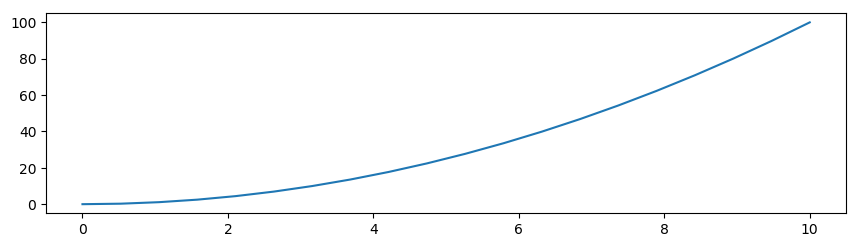

In [24]:
fig = plt.figure(figsize=(8, 2), dpi = 100)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y)

We can do the same thing with subplots() like this:

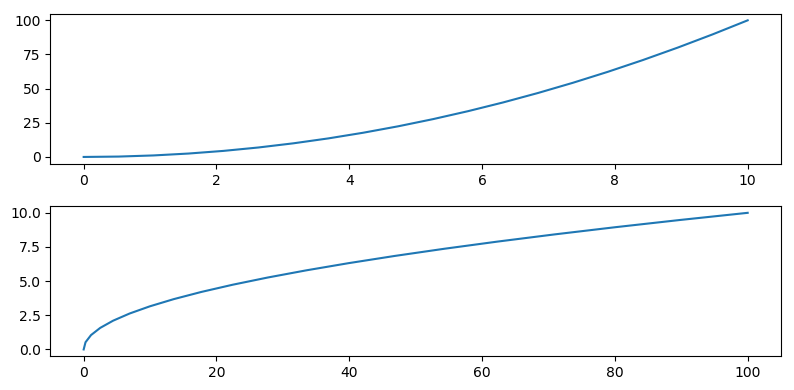

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 4), dpi=100)

ax[0].plot(x, y)
ax[1].plot(y, x)

plt.tight_layout()

In [ ]:
fig.savefig("image_filename.png", dpi=15)

You can specify the dpi, dots per inch, in the call to savefig(). For printing and most screens, 150 is pretty good, 300 is clear, and 600 is spectacular. 1200 or higher can come in handy if you want to be able to do a lot of zooming in, but your image can start to get very big on disk at that resolution.

### Change Figure background color

In [ ]:
fig = plt.figure(facecolor="#e1ddbf")
fig.savefig("image_filename.png", facecolor=fig.get_facecolor())

### Frame the Figure
Rounding out our menu of layout midifications is a frame around the whole Figure.

We can create a border by both choosing a nonzero `linewidth` and an `edgecolor` when creating our `Figure`. When calling `savefig()` we have to repeat our trick of explicitly setting the `edgecolor` in the output image.

![](../image/framing_fig_frame.png)

In [ ]:
fig = plt.figure(linewidth=10, edgecolor="#04253a")
fig.savefig("image_filename.png", edgecolor=fig.get_edgecolor()

## Decorate Axes

### Axis
While Axis, appeared as XAxis or YAxis, only contains Artists related to ticks and labels, it often requires some googling for minor tweaking, occasionally for an hour. I hope this section helps you get the job done quick.

|Axis attributes|	description|
|---------------|--------------|
|Axis.label|A Text instance for axis label|
|Axis.majorTicks|	A list of Tick instances for major ticks.|
|Axis.minorTicks|	A list of Tick instances for minor ticks.|

We used ax.set_xlabel and ax.set_ylabel in the example for Axes container. You might think these methods change X and Y label of Axes instance (ax), but in fact they change label attributes of XAxis and YAxis, ax.xaxis.label and ax.yaxis.label, respectively.

In [ ]:
xax = ax.xaxis
print('xax.label:', xax.label)
print('xax.majorTicks:\n', xax.majorTicks) # seven major ticks (from 0 to 6) and two invisible ticks locating outside of the figure
print('xax.minorTicks:\n', xax.minorTicks) # two ticks outside the figure

### xunits keyword for ax.plot
For your information, ax.plot has xunits keyword which is not described in the doc for the moment. I have never tried to use this option, but you can see an example in [Gallery > Radian ticks](https://matplotlib.org/gallery/units/radian_demo.html) and learn more about matplotlib.units.ConversionInterface [here](https://matplotlib.org/api/units_api.html).

In [ ]:
import numpy as np
from basic_units import radians, degrees, cos
from matplotlib.pyplot import figure, show

x = [val*radians for val in np.arange(0, 15, 0.01)]

fig = figure()
fig.subplots_adjust(hspace=0.3)

ax = fig.add_subplot(211)
line1, = ax.plot(x, cos(x), xunits=radians)

ax = fig.add_subplot(212)
line2, = ax.plot(x, cos(x), xunits=degrees)

### `ax.set_***` methods are ad hoc
Axes has many `set_***` helper methods to modify attributes and values of Axis and Tick instances. They are so handy that a large portion of problems matplotlib beginners encounter can be solved with some of them. It's worth noting that these `set_***` methods are static. Changes made with them are not updated when something changed. For example, if you change X ticks with `ax.set_xticks` to make them look nice with the first plot and the second plot exceeds the X range of the first plot, the result doesn't look like what it should be.

In [ ]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(x, np.sin(x), label='') # X range: 0 to 2pi
ax.set_xticks([0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
line2, = ax.plot(1.5*x, np.sin(x), label='') # X range: 0 to 3pi

### Change Axes background color

![](../image/framing_axes_bg_color.png)

In [ ]:
ax.set_facecolor("#e1ddbf")

### Combining multiple visualizations
It is possible to draw multiple plot elements on the same instance of axes.Axes. To do this we simply need to call another one of the plot methods on that axes object.

In [ ]:
ax.plot(x, y, linewidth=4)
ax.plot(x, y + .1, linewidth=2)
ax.plot(x, y + .2, linewidth=1)
ax.plot(x, y + .3, linewidth=.5)
ax.plot(x, y + .4, linewidth=.2)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we'll move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company', title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

### Spines

#### Hide axis spines
Removing unnecessary lines really cleans up a plot. The lines that form the border of the plot area are called axis spines, and sometimes they are expendable.

![](../image/framing_spines_off.png)

In [ ]:
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#### Move the spines around
We can also shift the spines around a bit. The y-axis spines can move right and left and the x-axis spines can move up and down.

![](../image/framing_spines_moved.png)

In [ ]:
ax.spines["top"].set_position(("outward", 15))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", .3))
ax.spines["right"].set_position(("outward", -40))

There are three different methods to move them: `data`, `axes`, and `outward`.

* `data` lets you specify the position in your data coordinates to place the spine. This is super useful for putting spines along the x = 0 and y = 0 lines.

* `axes` lets you name the position as a fraction of the Axes height and width. 0 is the bottom or the left of the plotting area, and 1 is the top or the right. .5 is right in the middle. Less than 0 or more than 1 is outside the plotting area.

* `outward` lets you indicate a position as an offset from the boundary of the plotting area, measured in points (there are 72 points in an inch). A positive offset is away from the center of the plotting area, a negative offset is toward it. A positive offset for a left spine would move it to the left, and a positive offset of a right spine would move it to the right, for example.

Note that all of these let you place spines outside the plotting area (or even outside the `Figure` boundaries).

#### Modify the spines

![](../image/framing_spines_styled.png)

In [ ]:
ax.spines["top"].set_color("orange")
ax.spines["left"].set_bounds(-.5, .5)
ax.spines["right"].set_linestyle("--")
ax.spines["bottom"].set_linewidth(6)
ax.spines["bottom"].set_capstyle("round")

Most of the settings should be familiar from the section on Lines, but it's worth calling out `set_bounds()`. It allows you to dictate the lower and upper bounds of an axis spine. There's no need for it to span the plotting area.

### Decorate Lines

#### Color, linewidth, linestyle, and marker
Matplotlib gives us a lot of options for customizing the appearance of our plots. By now, you should be familiar with changing line color using color=’red’ or ‘red’ like we did in previous examples. Now we want to change `linewidth` or `lw` , `linestyle` or `ls`, and mark out data points using `marker`. You can find a whole list of what is possible here and here.

For the sake of this example, we want our plot to have a linewidth of 3, our linestyle to be double dashes, we want to map out our datapoints using ‘o’ as our marker having a the markersize of 8:

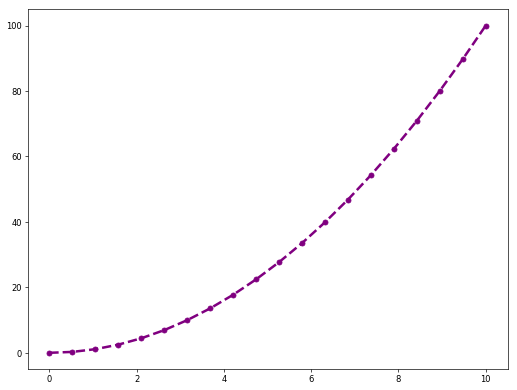

In [30]:
fig = plt.figure(figsize=(8, 6), dpi=60)
ax = fig.add_axes([0, 0, 1, 1])

# Change the line thickness to 3, line style to dashes, and mark out the data point
ax.plot(x, y, color='purple', linewidth=3, linestyle='--', marker='o')

Let’s understand a bit more about what arguments plt.plot() expects. The plt.plot accepts 3 basic arguments in the following order: **(x, y, format)**. 

This **format** is a short hand combination of {color}{marker}{line}. Few commonly used short hand format examples are:
* 'go-': ‘green colored dots with solid line’. 
* 'r*--' : ‘red stars with dashed lines’
* 'ks.' : ‘black squares with dotted line’ (‘k’ stands for black)
* 'bD-.' : ‘blue diamonds with dash-dot line’.

#### Line Styles

|character |       description|
|----------|------------------|
|``'-'``   |       solid line style|
|``'--'``  |       dashed line style|
|``'-.'``  |       dash-dot line style|
|``':'``   |       dotted line style|

#### How to change the transparency of lines?

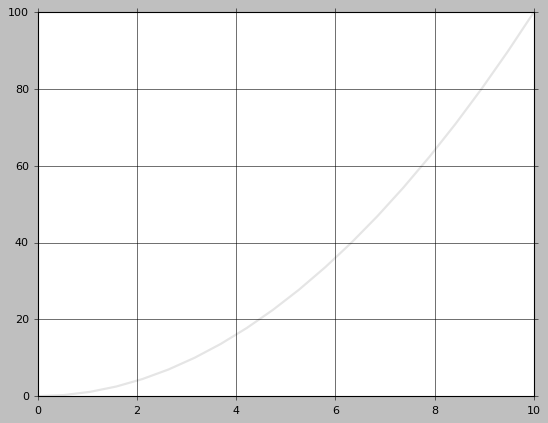

In [44]:
plt.plot(x, y, alpha = 0.1)

#### Style line ends and joins

Occasionally you want to really get in and control exactly how your lines look. The styling of the tips of the lines (capstyle) and the bends in the lines (joinstyle) let you do this.

The solid_capstyle and solid_joinstyle options in the snippet above give the varying effects seen in this figure.

![](../image/cap_join_styles.png)

In [ ]:
ax.plot(x, y, solid_capstyle="butt", solid_joinstyle="miter")
ax.plot(x, y, solid_capstyle="round", solid_joinstyle="round")
ax.plot(x, y, solid_capstyle="projecting", solid_joinstyle="bevel")

### Decorate Points

#### Change the size

In [ ]:
ax.scatter(x, y, s=80)

#### Make every marker a different size
The real power of the scatter() function somes out when we want to modify markers individually.
![](../image/markers_sized.png)

In [ ]:
# Here we created an array of sizes, one for each marker
sizes = (np.random.sample(size=x.size) * 10) ** 2
ax.scatter(x, y, s=sizes)

#### Change the marker style

In [ ]:
ax.scatter(x, y, marker="v")

#### Make multiple marker types
![](../image/markers_styled.png)

In [ ]:
N = x.size // 3
ax.scatter(x[:N], y[:N], marker="o")
ax.scatter(x[N: 2 * N], y[N: 2 * N], marker="x")
ax.scatter(x[2 * N:], y[2 * N:], marker="s")

#### Change the color

In [ ]:
ax.scatter(x, y, c="orange")

#### Change the color of each marker
![](../image/markers_colors.png)

In [ ]:
ax.scatter(x, y, c=x-y)

#### Make markers transparent
![](../image/markers_transparent.png)

In [ ]:
x = np.linspace(-1, 1, num=1e5)
y = x + np.random.normal(size=x.size)

ax.scatter(x, y, marker=".", alpha=.05, edgecolors="none")

Then by setting the `alpha` argument to something small, each individual point only contributes a small about of digital ink to the picture. Only in places where lots of points overlap is the result a solid color. `alpha=1` represents no transparency and is the default.

The `edgecolors="none"` is necessary to remove the marker outlines. For some marker types at least, the `alpha` argument doesn't apply to the outlines, only the solid fill.

### Legends
Legends allows us to distinguish between plots. With Legends, you can use label texts to identify or differentiate one plot from another. For example, say we have a figure having two plots like below:

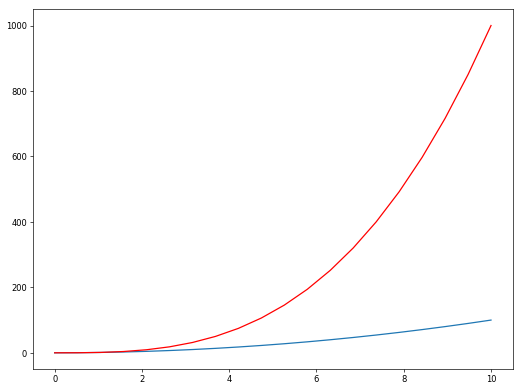

In [28]:
fig = plt.figure(figsize=(8, 6), dpi = 60)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, x**2)
ax.plot(x, x**3, 'red')

It could be really confusing to know what each plot represents. Hence, to identify the plots, we need to add a legend using `.legend()` and then specify the `label=” ”` attribute for each plot:

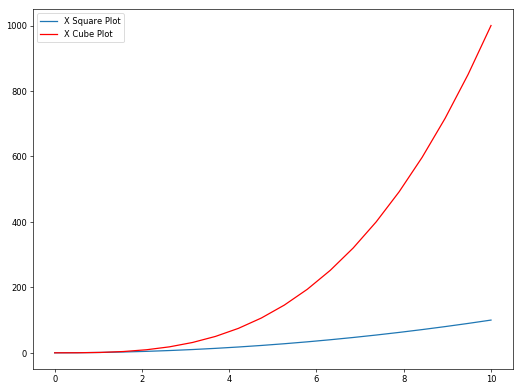

In [29]:
fig = plt.figure(figsize=(8, 6), dpi = 60)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, x**2, label="X Square Plot")
ax.plot(x, x**3, 'red', label='X Cube Plot')

ax.legend()

Let see another way to add legend below.

In [ ]:
# Create the figure and two axes (two rows, one columns)
fig, ax1 = plt.subplots(1,1)

# share the x-axis for both the axes (ax1, ax2)
ax2 = ax1.twinx()

# Create a plot of y = sin(x) on the first row
x1 = np.linspace(0, 4* np.pi, 100)
y1 = np.sin(x1)
# Add a label for the legend
function1 = ax1.plot(x1, y1, label='Sine')

# Create a plot of y = cos(x) on the second row
x2 = np.linspace(0, 4 * np.pi, 100)
y2 = np.cos(x2)
# Add a label for the legend
function2 = ax2.plot(x2, y2, label='Cosine')

# Create the legend by first fetching the labels from the functions
functions = function1 + function2
labels = [f.get_label() for f in functions]
plt.legend(functions, labels, loc=0)

# save the figure
plt.show()

Notice the loc=0 parameter. This sets the location of the legend. loc=0 automatically selects the best place for the legend. There is one clear downside of our current figure now. All the functions have the same color. The next improvement adds color to the plot.

sometimes you might want to construct the legend on your own. In that case, you need to pass the plot items you want to draw the legend for and the legend text as parameters to plt.legend() in the following format:

`plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))`

In [7]:
# plt.style.use('seaborn-notebook')
plt.figure(figsize=(10, 7), dpi=80)
X = np.linspace(0, 2 * np.pi, 1000)
sine = plt.plot(X, np.sin(X))
cosine = plt.plot(X, np.cos(X))
sine_2 = plt.plot(X, np.sin(X + .5))
cosine_2 = plt.plot(X, np.cos(X + .5))
plt.gca().set(ylim=(-1.25, 1.5), xlim=(-.5, 7))
plt.title('Custom Legend Example', fontsize=18)

# Modify legend
plt.legend(
    [sine[0], cosine[0], sine_2[0], cosine_2[0]],  # plot items
    ['sine curve', 'cosine curve', 'sine curve 2', 'cosine curve 2'], # label name
    frameon=True,  # legend border
    framealpha=1,  # transparency of border
    ncol=2,        # num columns
    shadow=True,   # shadow on
    borderpad=1,   # thickness of border
    title='Sines and Cosines', # title
    loc='lower right')   # location
plt.show()

#### Change label name

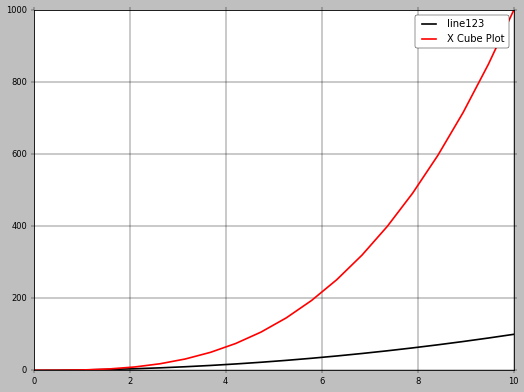

In [46]:
fig = plt.figure(figsize=(8, 6), dpi = 60)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, x**2, label="X Square Plot")
ax.plot(x, x**3, 'red', label='X Cube Plot')

L = plt.legend()
L.get_texts()[0].set_text('line123')

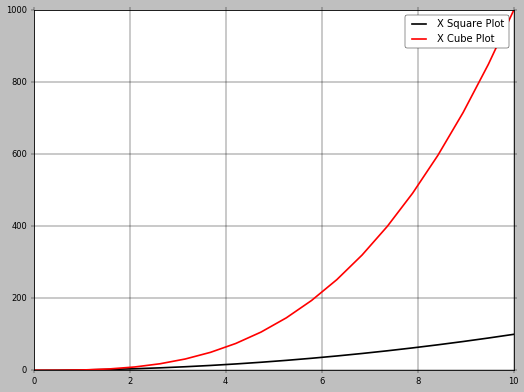

In [49]:
fig = plt.figure(figsize=(8, 6), dpi = 60)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, x**2)
ax.plot(x, x**3, 'red')

mylabels = ['X Square Plot', 'X Cube Plot']
plt.legend(labels = mylabels)

#### Change size

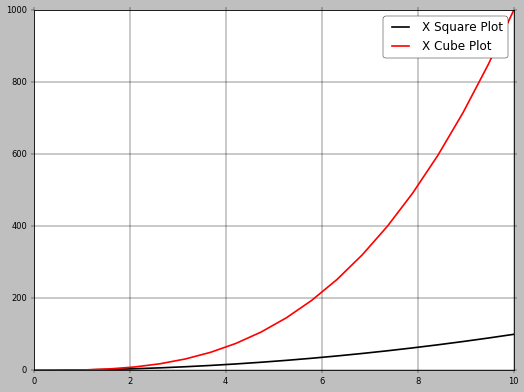

In [52]:
fig = plt.figure(figsize=(8, 6), dpi = 60)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, x**2, label="X Square Plot")
ax.plot(x, x**3, 'red', label='X Cube Plot')

ax.legend()
#plt.legend(fontsize = 10);
plt.legend(fontsize = 'x-large');

### Plot range
Matplotlib allows us to set limits for our plots. We can easily configure the range of our plots using the `set_ylim` and `set_xlim` methods of the axis object, or `axis('tight')` to automatically get “tightly fitted” axes ranges. For example, we can choose to show only plots between 0 to 1 of the x axis, and 0 to 5 of the y axis:

(0, 5)

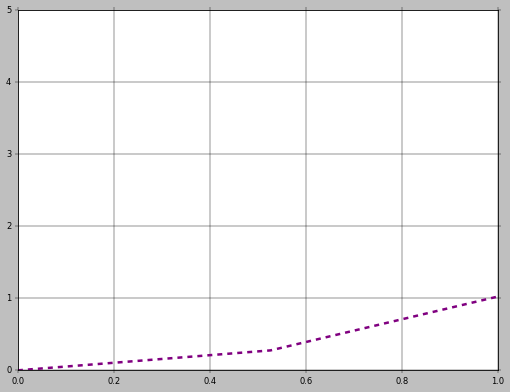

In [41]:
fig = plt.figure(figsize=(8,6), dpi = 60)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, color='purple', lw=3, ls='--')

# Using object API
ax.set_xlim([0, 1])
ax.set_ylim([0, 5])

(0, 5)

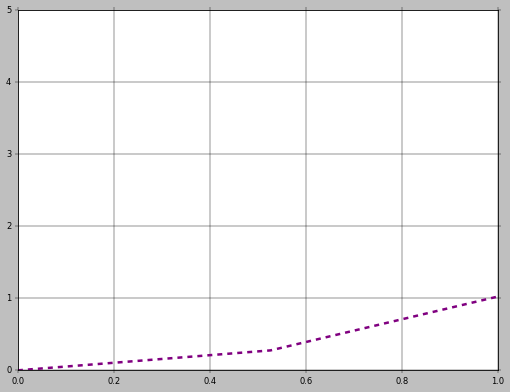

In [61]:
fig = plt.figure(figsize=(8,6), dpi = 60)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, color='purple', lw=3, ls='--')

# Using function
plt.xlim(0,1) #for y axis
plt.ylim(0, 5) #for x axis

#### Change scale

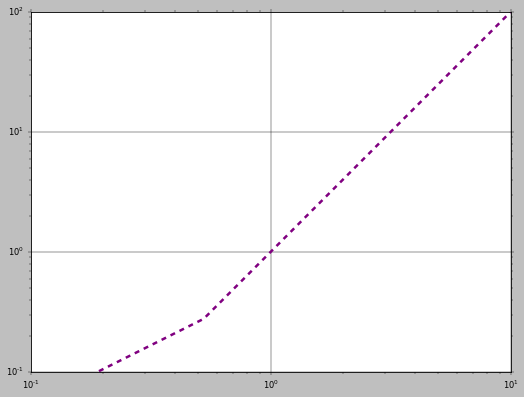

In [63]:
fig = plt.figure(figsize=(8,6), dpi = 60)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, color='purple', lw=3, ls='--')

# Using function
plt.yscale('log') #for y axis
plt.xscale('log') #for x axis

### Decorate Grid
There are many styles available in Matplotlib in order to let you tailor your visualization to your needs. To see a list of styles, we can use pyplot.style.

In [36]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


You can activate a style with the following:

<BarContainer object of 289 artists>

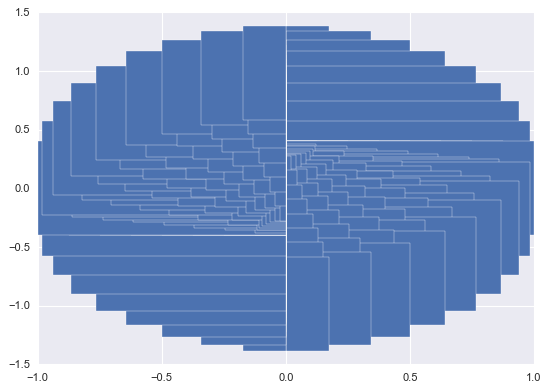

In [95]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(x, y)

#### How to add gridlines to plots?

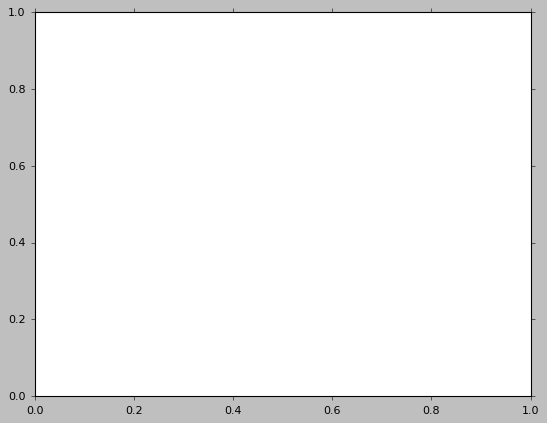

In [43]:
plt.grid(False)

### Decorate Ticks
Now we've got a plot with the general look that we want, so let's fine-tune it so that it's ready for print. First let's rotate the labels on the x-axis so that they show up more clearly. We can gain access to these labels with the axes.Axes.get_xticklabels() method:

**Ticker does it for you**

If you don't change tick-related settings with `set_***` methods, ticks and tick labels are automatically updated for each new plot accordingly. This is done by Ticker, more specifically, formatter and locator. Although they are quite essential for tick-related settings, you might know little about them if you have solved your problems by copying and pasting Stack Overflow answers6. Let's see what's going on in the previous example.

In [ ]:
xax = ax.xaxis
yax = ax.yaxis
print('xax.get_major_formatter()', xax.get_major_formatter())
print('yax.get_major_formatter()', yax.get_major_formatter())
print('xax.get_major_locator():',  xax.get_major_locator())
print('yax.get_major_locator():',  yax.get_major_locator())

`ScalarFormatter` is set for both X and Y axes, because it is a default formatter and we didn't change it. On the other hand, while default AutoLocator is set for Y axis, `FixedLocator` is set for X axis which we changed tick positions by using `ax.set_xticks` method. As you can imagine from its name, `FixedLocator` fixes tick positions and does not update them even if the plotting range is changed.

Let's change Ticker in the previous example instead of ax.set_xticks.

In [ ]:
import matplotlib.ticker as ticker # this is required to used `Ticker`
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5*np.pi)) # locate ticks at every 0.5*pi
fig # display the figure again with new locator.

How about formatter?

In [ ]:
@ticker.FuncFormatter # FuncFormatter can be used as a decorator
def major_formatter_radian(x, pos):
    return '{}$\pi$'.format(x/np.pi) # probably not the best way to show radian tick labels

ax.xaxis.set_major_formatter(major_formatter_radian)
fig

#### Tick label

In [ ]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

It looks like this cut off some of the labels on the bottom. We can tell Matplotlib to automatically make room for elements in the figures that we create. To do this we'll set the autolayout value of our rcParams. For more information on controlling the style, layout, and other features of plots with rcParams, see Customizing Matplotlib with style sheets and rcParams.

In [ ]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

Next, we'll add labels to the plot. To do this with the OO interface, we can use the axes.Axes.set() method to set properties of this Axes object.

In [ ]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company', title='Company Revenue')

We can also adjust the size of this plot using the pyplot.subplots() function. We can do this with the figsize kwarg.

Note

While indexing in NumPy follows the form (row, column), the figsize kwarg follows the form (width, height). This follows conventions in visualization, which unfortunately are different from those of linear algebra.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company', title='Company Revenue')

For labels, we can specify custom formatting guidelines in the form of functions by using the ticker.FuncFormatter class. Below we'll define a function that takes an integer as input, and returns a string as an output.

In [ ]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

formatter = FuncFormatter(currency)

We can then apply this formatter to the labels on our plot. To do this, we'll use the xaxis attribute of our axis. This lets you perform actions on a specific axis on our plot.

In [ ]:
fig, ax = plt.subplots(figsize=(6,8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company', title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)

([<matplotlib.axis.XTick at 0x294e302e0f0>,
 <a list of 5 Text xticklabel objects>)

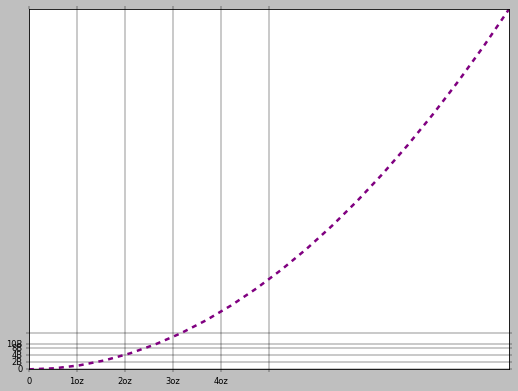

In [59]:
fig = plt.figure(figsize=(8,6), dpi = 60)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, color='purple', lw=3, ls='--')

plt.yticks([0,2,4,6,7,10], ['0', '2B', '4B', '8B', '10B'])
plt.xticks([0,1,2,3,4,5], ['0', '1oz', '2oz', '3oz', '4oz'])

#### Ticks Location
By default, ticks and tick labels will be added to the left and bottom axes. To make changes to this, you can use tick_params() to turn ticks and tick labels on and off for each axis independently.

In [ ]:
ax.tick_params(bottom=False, top=True, left=True, right=True)
ax.tick_params(labelbottom=False, labeltop=True, labelleft=True, labelright=True)

#### Ticks style
you can adjust the length, width, and color of them as well.

In [ ]:
ax.tick_params(axis="x", direction="in", length=16, width=2, color="turquoise")
ax.tick_params(axis="y", direction="in", length=6, width=4, color="orange")

#### Ticks label style
customize axis labels: Size, rotation, and color are all modifiable.

In [ ]:
ax.tick_params(axis="x", labelsize=18, labelrotation=-60, labelcolor="turquoise")
ax.tick_params(axis="y", labelsize=12, labelrotation=20, labelcolor="orange")

#### Locator 
Add minor ticks: We got minor ticks for free when we log scaled our axis, but if we want to add them on linear scales, we can do that too.

To do this we have to introduce the notion of a `Locator`. It's a function that generates the locations according to some rules. There are several different types, but Auto locators are a great place to start. They automatically create a reasonable set of ticks. By default, major ticks are initialized with an Auto locator, but minor ticks aren't. To turn them on, we have to import the `AutoMinorLocator` and use it to set minor ticks for the x- and y-axes.

In [ ]:
from matplotlib.ticker import AutoMinorLocator
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

#### Formatter
Add labels to the minor ticks: Another powerful tick tool is a `Formatter`. It's a function that lets you transform the tick label to be an integer, a fixed-place decimal, or lots of other things.

Here, we imported the `FormatStrFormatter`, and used it to create tick label strings using the coordinates of each tick.

In [ ]:
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.3f"))

The helpful package that contains all the `Formatters` and `Locators` is called ticker. If you are curious about all the Formatters and Locators you have at your disposal, I recommend the [formatter gallery](https://matplotlib.org/gallery/ticks_and_spines/tick-locators.html) and the [locator gallery](https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html).

When you have to do some tick gymnastics that are at all non-standard, the `FixedLocator` and `FixedFormatter` are your friends. These let you hard code in every tick location and tick label.

In [ ]:
from matplotlib.ticker import FixedLocator, FixedFormatter
x_formatter = FixedFormatter([
    "I like this spot", "and this", "and that", "but not this one."])
y_formatter = FixedFormatter(["-1e7", "111", "007", "xkcd"])
x_locator = FixedLocator([3, 7, 8.8, 12])
y_locator = FixedLocator([.85, 1.15, 1.28, 1.9])
ax.xaxis.set_major_formatter(x_formatter)
ax.yaxis.set_major_formatter(y_formatter)
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_locator(y_locator)

Supplying a list of positions to FixedLocator and a list of labels of the same length to FixedFormatter lets you arbitrarily specify the position and label of each tick.



### Decorate Text

#### Plot title, x label, y label

In [ ]:
ax.set_xlabel("The x-axis label")
ax.set_ylabel("The y-axis label")
ax.set_title("The Title")

Adding Title and Axis labels - Now we will add the title to our plot and add the axis labels by using the following code changes:

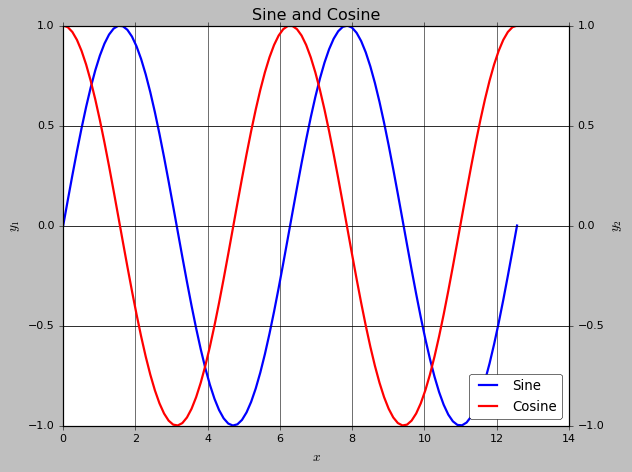

In [53]:
# Create the figure and two axes (two rows, one columns)
fig, ax1 = plt.subplots(1,1)

# share the x-axis for both the axes (ax1, ax2)
ax2 = ax1.twinx()

# Create a plot of y = sin(x) on the first row
x1 = np.linspace(0, 4* np.pi, 100)
y1 = np.sin(x1)
# Add a label for the legend
function1 = ax1.plot(x1, y1, 'b', label='Sine')

# Create a plot of y = cos(x) on the second row
x2 = np.linspace(0, 4 * np.pi, 100)
y2 = np.cos(x2)
# Add a label for the legend
function2 = ax2.plot(x2, y2, 'r', label='Cosine')

# Create the legend by first fetching the labels from the functions
functions = function1 + function2
labels = [f.get_label() for f in functions]
plt.legend(functions, labels, loc=0)

# Using Object API
# Add x-label (only one, since it is shared) and the y-labels
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y_1$')
ax2.set_ylabel('$y_2$')

# Add the title
plt.title('Sine and Cosine')

# Adjust the figure such that all rendering components fit inside the figure
plt.tight_layout()

# save the figure
plt.show()

(array([1800., 1850., 1900., 1950., 2000., 2050.]),
 <a list of 6 Text xticklabel objects>)

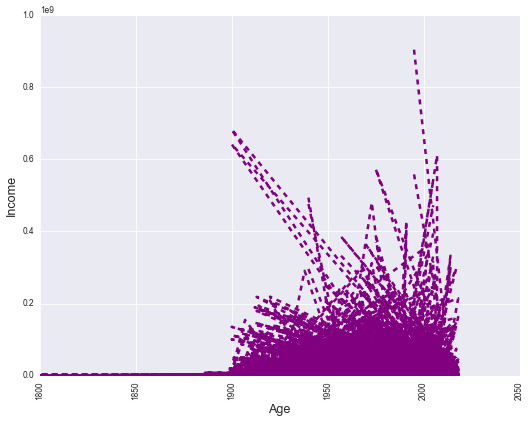

In [154]:
fig = plt.figure(figsize=(8,6), dpi = 60)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, color='purple', lw=3, ls='--')

# Using function
plt.ylabel('Income', fontsize = 15) #for y label
plt.xlabel('Age', fontsize = 15)    #for x label
plt.xticks(rotation='90')

#### Put any text anywhere at (x,y) location

In [ ]:
ax.text(-5, .8, "Some text")

#### Fine-tune text placement at bottom/top/left/right
The horizontalalignment argument lets you specify whether the x position you feed it should be fall just to the right of the text, to the left, or in the center.

As you probably guessed, the verticalalignment argument lets you specify where the y position you supply should fall: at the top of the text, at the bottom, or in the center. There is also a baseline option, the position of the bottoms of most of the letters except for things with tails like y, g, p, and q.

![Text alignment options](../image/text_alignment.png)

In [ ]:
ax.text(-1, -1, "right-top",
        horizontalalignment="right",
        verticalalignment="top")

#### Customize your text style
![Text styles](../image/text_styles.png)

In [ ]:
ax.text(-1, 1, 'fontsize=16', fontsize=16)
ax.text(-1, 0, 'fontstyle="italic"', fontstyle="italic")
ax.text(-1, -1, 'fontweight="bold"', fontweight="bold")
ax.text(1, -1, "rotation=15", rotation=15)
ax.text(1, 0, 'color="red"', color="red")
ax.text(1, 1, 'family="serif"', family="serif")

#### Put your text in a box
`text()` accepts a bbox argument, which takes a dictionary of keywords that describe the bounding box. A square boxstyle is a good place to start. It comes colorful by default, but if you specify a white box facecolor, it will blend in nicely.

![Text in a box](../image/text_bbox.png)

If on the other hand you'd like to explore the limits of what's possible in bounding boxes, take a look at [the fancy gallery in Matplotlib](https://matplotlib.org/gallery/pyplots/whats_new_98_4_fancy.html#sphx-glr-gallery-pyplots-whats-new-98-4-fancy-py). You won't be disappointed.


In [ ]:
ax.text(2, .4, "Text in a box",
        bbox=dict(boxstyle = "square",
                  facecolor = "white"))

#### Point your text at something
A powerful way to turn a picture into a story is with annotation, bits of text pointing to something in a plot. Annotation can be used to call out surprising features, label separate curves, add auxiliiary information, or explain the significance of a wiggle.

Returning to our sinc() example, we can show annotations pointing to various aspects of the curve.

In [ ]:
ax.annotate(
    "Some annotation text",
    (x_point, y_point),
    (x_text, y_text),
    arrowprops=dict(arrowstyle = "-|>"))

The pattern for calling out an annotation has several parts, and they're all mixed up from what we've seen before. Now the first argument to annotate() is the text. Then a Tuple of the x- and y-positions for the end of the pointer line. And only then, a Tuple of the x- and y-positions of the text. And note the use of Tuples here, where text() accepts x and y as separate arguments.

And after getting through all that, specifying the arrow has it's own quirky syntax. The arrowprops argument takes a dictionary of arrow properties. arrowstyle is the most important one to call out. Here, -|> denotes a line with a triangular arrow head at the non-text end. There are several others (take a close look at the example plot) and even the ability to draw your own custom arrow designs. Visit the [fancy gallery to get a sense of the choices on tap](https://matplotlib.org/gallery/pyplots/whats_new_98_4_fancy.html#sphx-glr-gallery-pyplots-whats-new-98-4-fancy-py).

![](../image/text_annotate.png)

For a deeper dig into everything that's possible with annotations, take a look through the [API for annotate()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html).

In [ ]:
# Texts, Arrows and Annotations Example
# ref: https://matplotlib.org/users/annotations_guide.html
plt.figure(figsize=(14,7), dpi=120)
X = np.linspace(0, 8*np.pi, 1000)
sine = plt.plot(X,np.sin(X), color='tab:blue');

# 1. Annotate with Arrow Props and bbox
plt.annotate('Peaks', xy=(90/57.2985, 1.0), xytext=(90/57.2985, 1.5),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='green', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')

# 2. Texts at Peaks and Troughs
for angle in [440, 810, 1170]:
    plt.text(angle/57.2985, 1.05, str(angle) + "\ndegrees", transform=plt.gca().transData, horizontalalignment='center', color='green')

for angle in [270, 630, 990, 1350]:
    plt.text(angle/57.2985, -1.3, str(angle) + "\ndegrees", transform=plt.gca().transData, horizontalalignment='center', color='red')    

plt.gca().set(ylim=(-2.0, 2.0), xlim=(-.5, 26))
plt.title('Annotations and Texts Example', fontsize=18)
plt.show()

Notice, all the text we plotted above was in relation to the data.

That is, the x and y position in the plt.text() corresponds to the values along the x and y axes. However, sometimes you might work with data of different scales on different subplots and you want to write the texts in the same position on all the subplots.

In such case, instead of manually computing the x and y positions for each axes, you can specify the x and y values in relation to the axes (instead of x and y axis values).

You can do this by setting transform=ax.transData.

The lower left corner of the axes has (x,y) = (0,0) and the top right corner will correspond to (1,1).

The below plot shows the position of texts for the same values of (x,y) = (0.50, 0.02) with respect to the Data(transData), Axes(transAxes) and Figure(transFigure) respectively.

In [ ]:
# Texts, Arrows and Annotations Example
plt.figure(figsize=(14,7), dpi=80)
X = np.linspace(0, 8*np.pi, 1000)

# Text Relative to DATA
plt.text(0.50, 0.02, "Text relative to the DATA centered at : (0.50, 0.02)", transform=plt.gca().transData, fontsize=14, ha='center', color='blue')

# Text Relative to AXES
plt.text(0.50, 0.02, "Text relative to the AXES centered at : (0.50, 0.02)", transform=plt.gca().transAxes, fontsize=14, ha='center', color='blue')

# Text Relative to FIGURE
plt.text(0.50, 0.02, "Text relative to the FIGURE centered at : (0.50, 0.02)", transform=plt.gcf().transFigure, fontsize=14, ha='center', color='blue')

plt.gca().set(ylim=(-2.0, 2.0), xlim=(0, 2))
plt.title('Placing Texts Relative to Data, Axes and Figure', fontsize=18)
plt.show()

In [ ]:
from matplotlib.ticker import FuncFormatter

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

This data is naturally visualized as a barplot, with one bar per group. To do this with the object-oriented approach, we'll first generate an instance of figure.Figure and axes.Axes. The Figure is like a canvas, and the Axes is a part of that canvas on which we will make a particular visualiza

In [ ]:
fig, ax = plt.subplots()
# Now that we have an Axes instance, we can plot on top of it.
ax.barh(group_names, group_data)

#### Make beautiful equations
If you happen to have LaTeX on your computer, you can use it to typeset your equations right in your plots. Your symbols will be crisp. Your placements will be correct. Your equations will be legible and, even when unitelligible, aesthetically pleasing.

In [ ]:
matplotlib.rcParams['text.usetex'] = True
ax.text(
    0, 0,
    r"$f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}" +
    r"e^{- \frac{(x - \mu)^2}{2\sigma^2}}$")

There are a couple little tricks to getting this working.

First, you need to make sure that the setting usetex is set to True.

Then you need to make sure to use r-strings (string literals) so that python doesn't try to convert escape characters in your string.

Also, don't forget to enclose your equation in dollar signs ($). That tells LaTeX to enter math mode.

![](../image/text_equation.png)

# Transformations
Like any graphics packages, matplotlib is built on top of a transformation framework to easily move between coordinate systems:
* the **userland data** coordinate system
* the **axes** coordinate system
* the **figure** coordinate system
* the **display** coordinate system

|Coordinate	|Transformation Object	|Description|
|-----------|-----------------------|-----------|
|data	|ax.transData	|The userland data coordinate system, controlled by the xlim and ylim|
|axes	|ax.transAxes	|The coordinate system of the Axes; (0,0) is bottom left of the axes, and (1,1) is top right of the axes.|
|figure	|fig.transFigure	|The coordinate system of the Figure; (0,0) is bottom left of the figure, and (1,1) is top right of the figure.|
|display	|None	|This is the pixel coordinate system of the display; (0,0) is the bottom left of the display, and (width, height) is the top right of the display in pixels. Alternatively, the identity transform (matplotlib.transforms.IdentityTransform()) may be used instead of None.|

All of the transformation objects in the table above take inputs in their coordinate system, and transform the input to the display coordinate system. That is why the display coordinate system has None for the Transformation Object column – it already is in display coordinates. The transformations also know how to invert themselves, to go from display back to the native coordinate system.

## Data coordinates
Whenever you add data to the axes, matplotlib updates the datalimits, most commonly updated with the set_xlim() and set_ylim() methods.

In [ ]:
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

plt.show()

You can use the ax.transData instance to transform from your data to your display coordinate system, either a single point or a sequence of points as shown below:

In [ ]:
print(type(ax.transData))
ax.transData.transform((5, 0))

You can use the inverted() method to create a transform which will take you from display to data coordinates:

In [ ]:
inv = ax.transData.inverted()
print(type(inv))
inv.transform((221.4,  144.72))

## Axes coordinates
Here the point (0,0) is the bottom left of your axes or subplot, (0.5, 0.5) is the center, and (1.0, 1.0) is the top right. You can also refer to points outside the range, so (-0.1, 1.1) is to the left and above your axes. This coordinate system is extremely useful when placing text in your axes, because you often want a text bubble in a fixed, location, e.g., the upper left of the axes pane, and have that location remain fixed when you pan or zoom. Here is a simple example that creates four panels and labels them ‘A’, ‘B’, ‘C’, ‘D’ as you often see in journals.

In [ ]:
fig = plt.figure()
for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = fig.add_subplot(2,2,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

plt.show()

In below example, use the pan/zoom tool to move around, or manually change the data xlim and ylim, and you will see the data move but the circle will remain fixed because it is not in data coordinates and will always remain at the center of the axes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax = fig.add_subplot(111)
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y, 'go')  # plot some data in data coordinates

circ = patches.Circle((0.5, 0.5), 0.25, transform=ax.transAxes,
                      facecolor='yellow', alpha=0.5)
ax.add_patch(circ)

plt.show()

## Blended transformations
Drawing in blended coordinate spaces which mix axes with data coordinates is extremely useful, for example to create a horizontal span which highlights some region of the y-data but spans across the x-axis regardless of the data limits, pan or zoom level, etc. In fact these blended lines and spans are so useful, we have built in functions to make them easy to plot (see axhline(), axvline(), axhspan(), axvspan()) but for didactic purposes we will implement the horizontal span here using a blended transformation. This trick only works for separable transformations, like you see in normal Cartesian coordinate systems, but not on inseparable transformations like the PolarTransform

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.random.randn(1000)

ax.hist(x, 30)
ax.set_title(r'$\sigma=1 \/ \dots \/ \sigma=2$', fontsize=16)

# the x coords of this transformation are data, and the
# y coord are axes
trans = transforms.blended_transform_factory(
    ax.transData, ax.transAxes)

# highlight the 1..2 stddev region with a span.
# We want x to be in data coordinates and y to
# span from 0..1 in axes coords
rect = patches.Rectangle((1,0), width=1, height=1,
                         transform=trans, color='yellow',
                         alpha=0.5)

ax.add_patch(rect)

plt.show()

The blended transformations where x is in data coords and y in axes coordinates is so useful that we have helper methods to return the versions mpl uses internally for drawing ticks, ticklabels, etc. The methods are matplotlib.axes.Axes.get_xaxis_transform() and matplotlib.axes.Axes.get_yaxis_transform(). So in the example above, the call to blended_transform_factory() can be replaced by get_xaxis_transform:

In [ ]:
trans = ax.get_xaxis_transform()

## Using offset transforms to create a shadow effect
One use of transformations is to create a new transformation that is offset from another transformation, e.g., to place one object shifted a bit relative to another object. Typically you want the shift to be in some physical dimension, like points or inches rather than in data coordinates, so that the shift effect is constant at different zoom levels and dpi settings.

One use for an offset is to create a shadow effect, where you draw one object identical to the first just to the right of it, and just below it, adjusting the zorder to make sure the shadow is drawn first and then the object it is shadowing above it. The transforms module has a helper transformation ScaledTranslation. It is instantiated with:

In [ ]:
trans = ScaledTranslation(xt, yt, scale_trans)

## The transformation pipeline
[Reference](https://matplotlib.org/users/transforms_tutorial.html)

# Matplotlib Basic Plots

Frequently used commands in the given examples:

* _plt.figure()_: To create a new figure
* _plt.plot()_: Plot y versus x as lines and/or markers
* _plt.xlabel()_: Set the label for the x-axis
* _plt.ylabel()_: Set the label for the y-axis
* _plt.title()_: Set a title for the axes
* _plt.grid()_: Configure the grid lines
* _plt.legend()_: Place a legend on the axes
* _plt.savefig()_: To save the current figure on the disk
* _plt.show()_: Display a figure
* _plt.clf()_: Clear the current figure(useful to plot multiple figures in the same code)

In [4]:
x = np.linspace(0, 10, 20)
y = x**2
z = x + 4

## Scatter plots
Scatter plot helps in visualizing 2 numeric variables. It helps in identifying the relationship of the data with each variable i.e correlation or trend patterns. It also helps in detecting outliers in the plot.

**When to use**: It is used in Machine learning concepts like regression, where x and y are continuous variables. It is also used in clustering scatters or outlier detection.

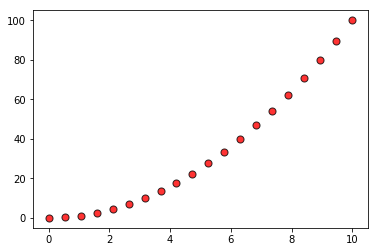

In [5]:
plt.scatter(x,
            y,
            label='Number of properties built',
            s=200,
            color='red',
            alpha=0.8,
            marker='.',
            edgecolors='black')

3D scatter plots are used to plot data points on three axes in an attempt to show the relationship between three variables. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X, Y, and Z axes.

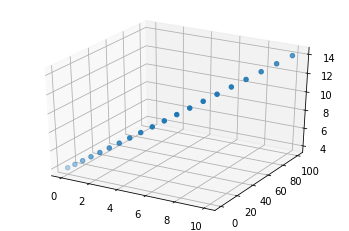

In [6]:
# Import libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, z)


## Line plots
A line plot is a basic chart that displays information as a series of data points called markers connected by straight line segments

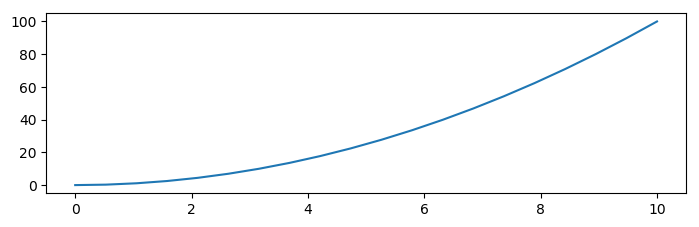

In [7]:
fig = plt.figure(figsize=(8, 2), dpi = 100)
ax = fig.add_axes([0.1, 0.2, 0.8, 0.9])
lines = ax.plot(x,y)

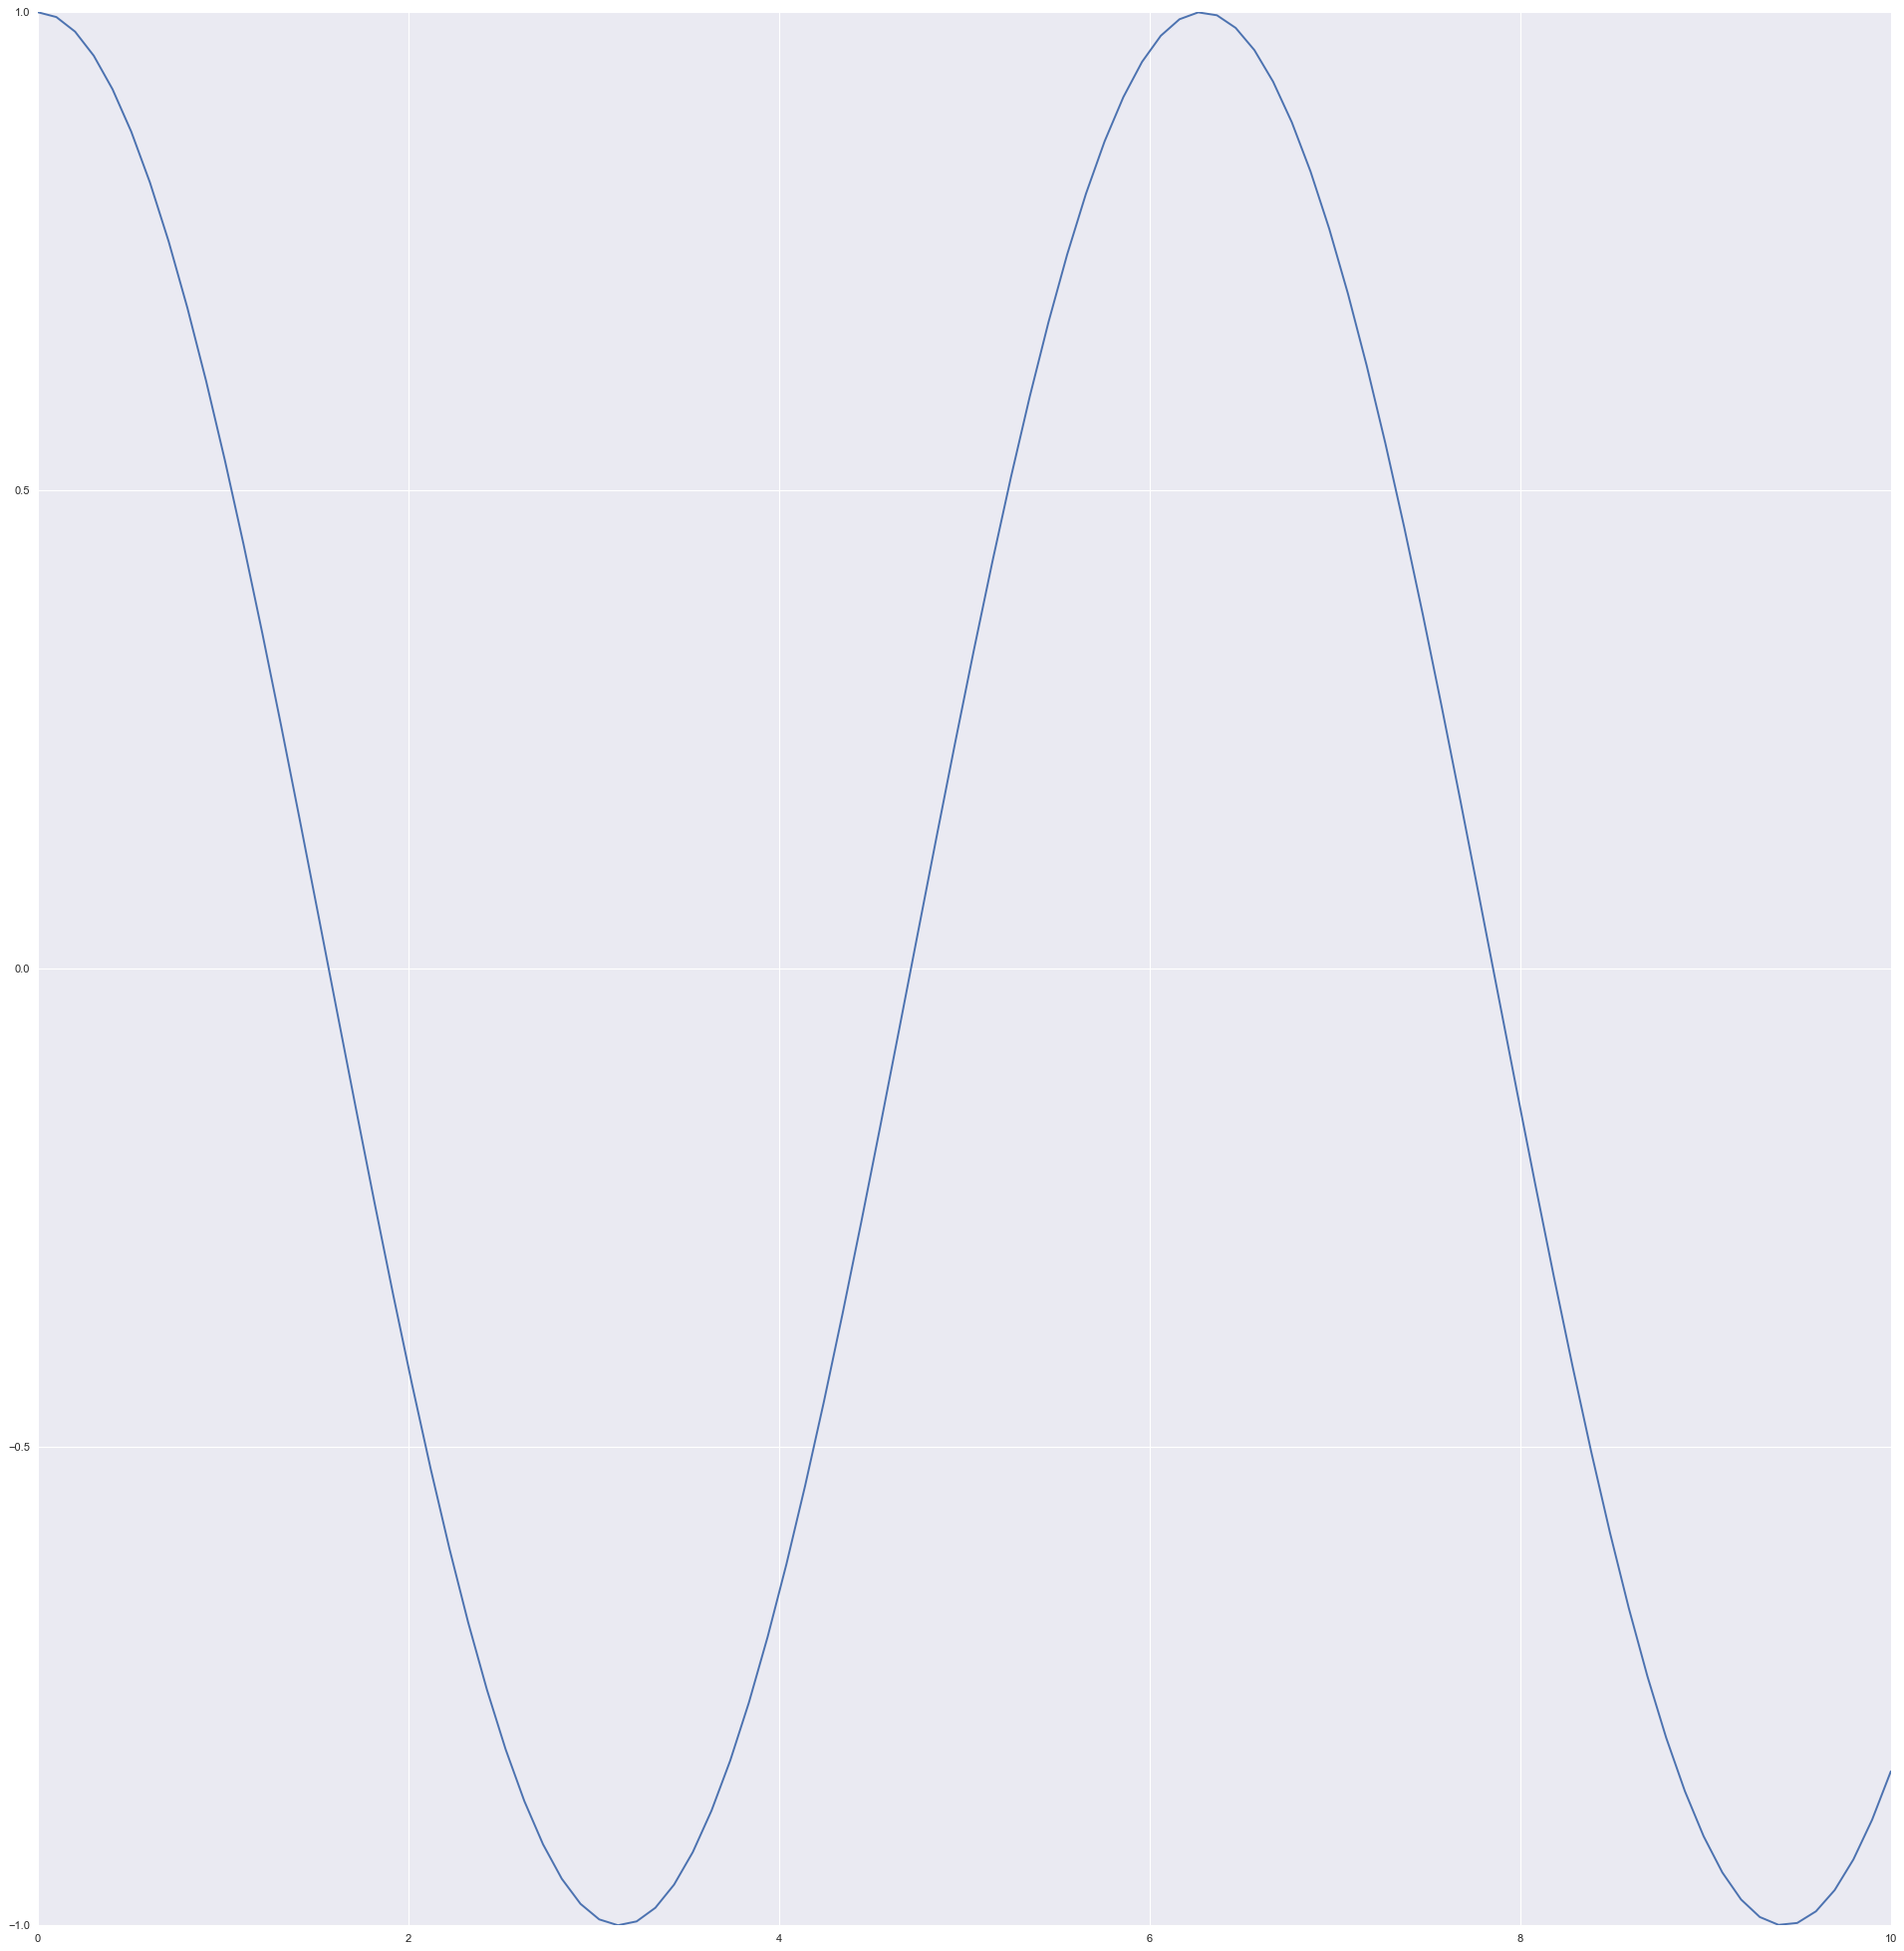

In [169]:
plt.plot(x, y)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.8, 0.9])
ax.axhline(0.45)

### 3D Line Plot
3D Line Plots can be used in the cases when we have one variable that is constantly increasing or decreasing. This variable can be placed on the Z-axis while the change of the other two variables can be observed in the X-axis and Y-axis w.r.t Z-axis. For example, if we are using time series data (such as planetary motions) the time can be placed on Z-axis and the change in the other two variables can be observed from the visualization.

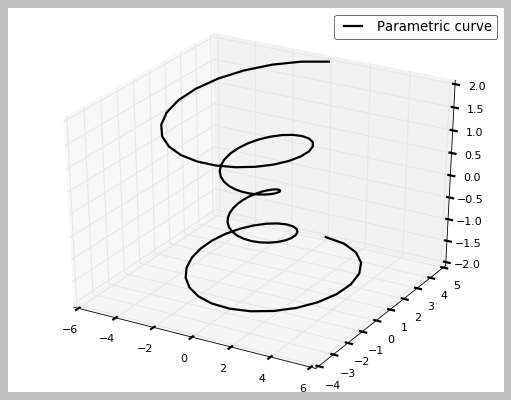

In [81]:
# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Create data point to plot
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

# Plot line graph 
ax.plot(x, y, z, label='Parametric curve')

# Set default legend
ax.legend()

plt.show()

## Bar plots
Bar Plot shows the distribution of data over several groups. It is commonly confused with a histogram which only takes numerical data for plotting. It helps in comparing multiple numeric values.

**When to use**: It is used when to compare between several groups.

<BarContainer object of 20 artists>

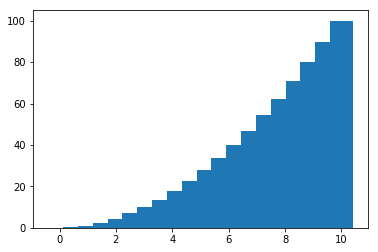

In [8]:
plt.bar(x, y)

<BarContainer object of 20 artists>

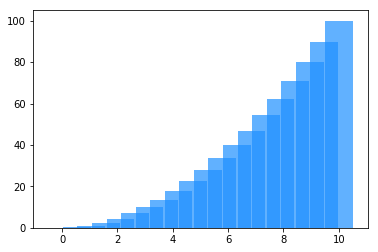

In [9]:
plt.bar(x, y, label = 'Number of properties built', color = 'dodgerblue',  width = 1, align = 'center', alpha = 0.7)

### barh

<BarContainer object of 3 artists>

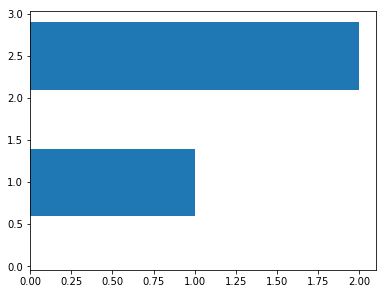

In [10]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.8, 0.9])
ax.barh([0.5, 1, 2.5],[0,1,2])

### 2D Bar Plot in 3D

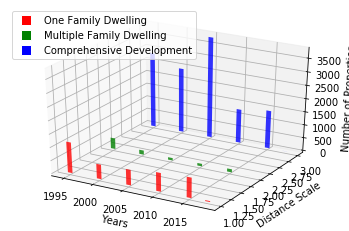

In [11]:
"""
========================================
Create 2D bar graphs in different planes
========================================
Demonstrates making a 3D plot which has 2D bar graphs projected onto
planes y=0, y=1, etc.
"""

# Import libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Get the Property Tax Report dataset
# Dataset link: https://data.vancouver.ca/datacatalogue/propertyTax.htm
data = pd.read_csv('../dataset/property_tax_report_2018.csv')

# Groupby Zone catrgory and Year built to seperate for each zone
newdata = data.groupby(['YEAR_BUILT','ZONE_CATEGORY']).agg('count').reset_index()

# Create list of years that are found in all zones that we want to plot
years = [1995,2000,2005,2010,2015,2018]

# Create list of Zone categoreis that we want to plot
categories = ['One Family Dwelling', 'Multiple Family Dwelling', 'Comprehensive Development']

# Plot bar plot for each category
for cat,z,c in zip(categories,[1,2,3],['r','g','b']):
    category = newdata[(newdata['ZONE_CATEGORY']==cat) & (newdata['YEAR_BUILT'].isin(years))]
    ax.bar(category['YEAR_BUILT'], category['PID'],zs=z, zdir='y', color=c, alpha=0.8)
    
# Set labels
ax.set_xlabel('Years')
ax.set_ylabel('Distance Scale')
ax.set_zlabel('Number of Properties')

# Create customized legends 
legend_elements = [Line2D([0], [0], marker='s', color='w', label='One Family Dwelling',markerfacecolor='r', markersize=10),
                  Line2D([0], [0], marker='s', color='w', label='Multiple Family Dwelling',markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Comprehensive Development',markerfacecolor='b', markersize=10)
                  ]
                   
# Make legend
ax.legend(handles=legend_elements, loc='best')

plt.show()

## Histogram
A histogram takes in a series of data and divides the data into a number of bins. It then plots the frequency data points in each bin (i.e. the interval of points). It is useful in understanding the count of data ranges.

**When to use**: We should use histogram when we need the count of the variable in a plot.

**Components of a histogram**

* **n**: Contains the frequency of each bin
* **bins**: Represents the middle value of each bin
* **patches**: The Patch object for the rectangle shape representing each bar

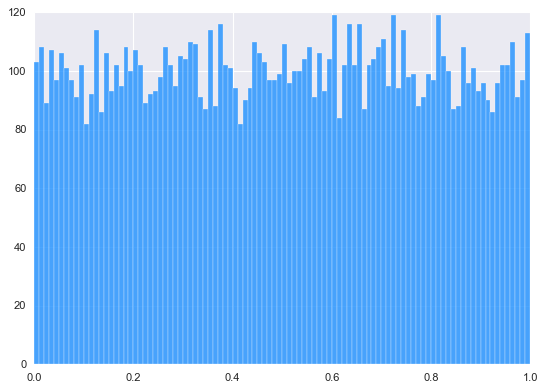

In [129]:
irand = np.random.sample(10000)
n, bins, patches = plt.hist(irand,
                            bins=100,
                            histtype='bar',
                            rwidth=1.0,
                            color='dodgerblue',
                            alpha=0.8)

**Cumulative property**

If True, then a histogram is computed where each bin gives the counts in that bin plus all bins for smaller value.The last bin gives the total number of datapoints.

The cumulative property gives us the end added value and helps us understand the increase in value at each bin.

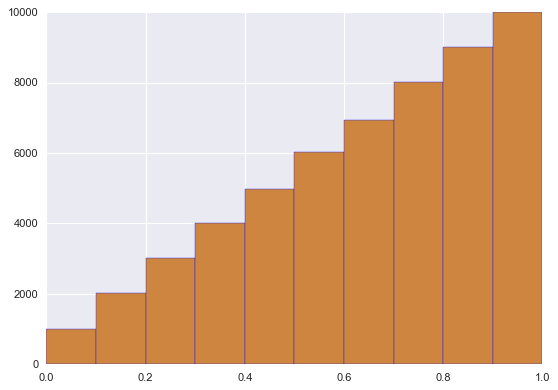

In [130]:
irand = np.random.sample(10000)
plt.hist(irand, facecolor='peru', edgecolor='blue', bins=10, cumulative=True)
plt.show()

**Check the histogram to a range of values**

We only look at the data points within the range 2M-5M. This realigns the bins in the historgram

Range helps us in understanding value distribution between specified values.

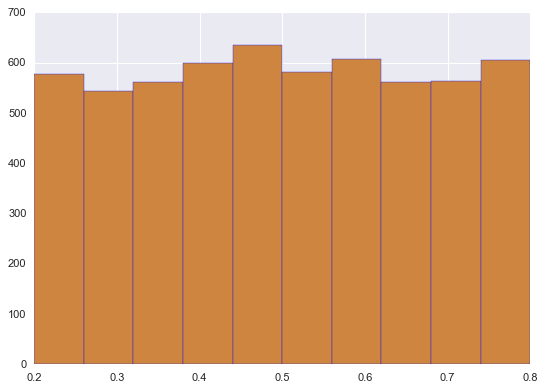

In [132]:
irand = np.random.sample(10000)
plt.hist(irand, facecolor='peru', edgecolor='blue', bins=10, range=(0.2, 0.8))
plt.show()

**Multiple histograms**

Multiple histograms are useful in understanding the distribution between 2 entity variables. 

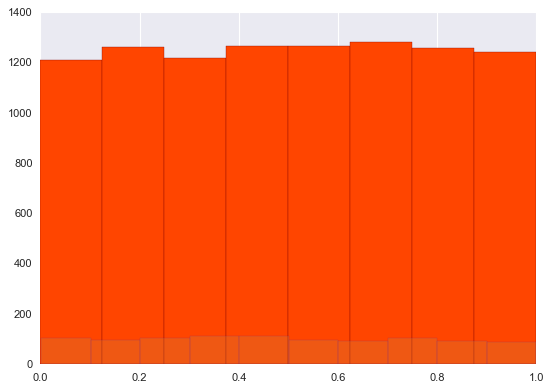

In [134]:
irand = np.random.sample(10000)
irand1 = np.random.sample(1000)

plt.hist(irand, facecolor='orangered', edgecolor='maroon', bins=8)
plt.hist(irand1, facecolor='peru', edgecolor='blue', bins=10, alpha=0.3)
plt.show()

## Kernel density plot
(x: Numerical #1, y: Numerical #2). Numerical #2 is the frequency of Numerical #1.
![](../image/densityplot.png)
2-D kernel density plot (x: Numerical #1, y: Numerical #2, color: Numerical #3). Numerical #3 is the joint frequency of Numerical #1 and Numerical #2.
![](../image/densityplot_3d.png)

## Box plot
Boxplot gives a nice summary of the data. It helps in understanding our distribution better.

**When to use**: It should be used when we require to use the overall statistical information on the distribution of the data. It can be used to detect outliers in the data.

**Understanding Boxplot**
<img src="../image/understand_boxplot.png" alt="Understanding Boxplot" title="Understanding Boxplot" />

From the above diagram:
* the line that divides the box into 2 parts represents the **median** of the data. 
* The end of the box shows the **upper quartile**(75%) - Upper Quartile is also called **3rd quartile**
* The start of the box represents the **lower quartile**(25%) - Lower Quartile is also called as **1st quartile**
* The region between lower quartile and the upper quartile is called as **Inter Quartile Range(IQR)** and it is used to approximate the 50% spread in the middle data(75–25=50%). 
* The **maximum** is the highest value in data 
* The **minimum** is the lowest value in data, it is also called as caps. 
* The points outside the boxes and between the maximum and maximum are called as **whiskers**, they show the **range of values** in data. 
* The extreme points are **outliers** to the data. A commonly used rule is that a value is an outlier if it’s less than lower quartile-1.5 * IQR or high than the upper quartile + 1.5* IQR.

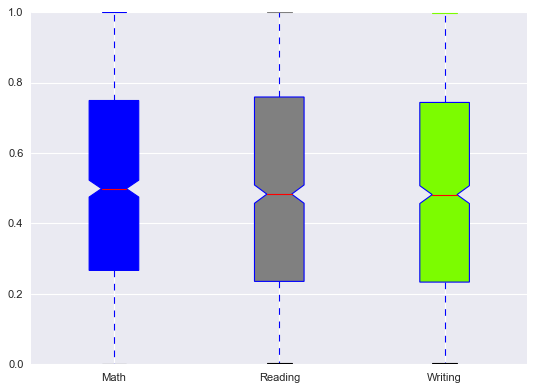

In [139]:
colors = ['blue', 'grey', 'lawngreen']
math = np.random.sample(1000)
reading = np.random.sample(1000)
writing = np.random.sample(1000)

bp = plt.boxplot([math, reading, writing], patch_artist=True, notch=True)
for i in range(len(bp['boxes'])):
    bp['boxes'][i].set(facecolor=colors[i])
    bp['caps'][2*i + 1].set(color=colors[i])
    
plt.xticks([1,2,3],['Math','Reading','Writing'])
plt.show()

bp contains the boxplot components like boxes, whiskers, medians, caps. `patch_artist` makes the customization possible, `notch` makes the median look more prominent

## Violin plot
Violin plot is a better chart than boxplot as it gives a much broader understanding of the distribution. It resembles a violin and dense areas point the more distribution of data otherwise hidden by box plots

**When to use**: Its an extension to boxplot. It should be used when we require a better intuitive understanding of data.

Similar to boxplots, except they can show the density of the data points around a particular value with their widths.

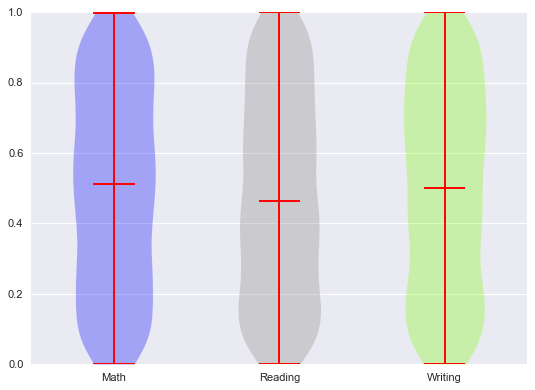

In [140]:
colors = ['blue', 'grey', 'lawngreen']
math = np.random.sample(1000)
reading = np.random.sample(1000)
writing = np.random.sample(1000)

vp = plt.violinplot([math, reading, writing], showmedians=True)
plt.xticks([1,2,3],['Math','Reading','Writing'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])   

plt.show()

## Heat map

## Stack Plot - stackplot
Stack plot visualizes data in stacks and shows the distribution of data over time.

**When to use**: It is used for checking multiple variable area plots in a single plot.

**Eg**: It is useful in understanding the change of distribution in multiple variables over an interval.

In [147]:
# Get the Property Tax Report dataset
# Dataset link: https://data.vancouver.ca/datacatalogue/propertyTax.htm
data = pd.read_csv('../dataset/property_tax_report_2018.csv')
data.head(2)

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,NARRATIVE_LEGAL_LINE5,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE
0,007-625-022,LAND,600280040000,60028004,CD-1 (109),Comprehensive Development,1,2,VAP15707,THSL,...,NaN,6889000.0,8160000.0,2018.0,5439000.0,7169000.0,1977.0,1978.0,38563.84,20
1,018-381-987,STRATA,157612510070,15761251,CD-1 (266),Comprehensive Development,70,NaN,LMS1008,NaN,...,NaN,8200.0,6700.0,2018.0,7100.0,7800.0,1993.0,1993.0,36.77,30


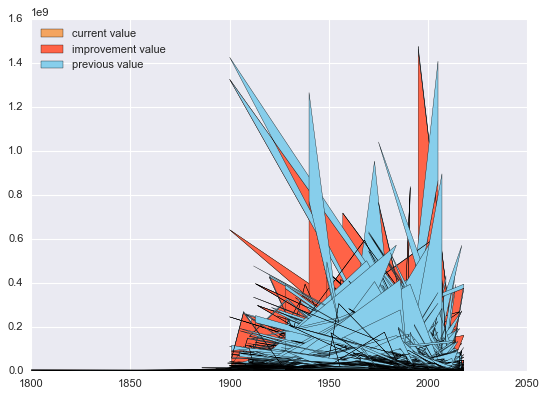

In [144]:
x = data['YEAR_BUILT']
y = np.vstack([data['PREVIOUS_LAND_VALUE'],
    data['CURRENT_LAND_VALUE'], data['CURRENT_IMPROVEMENT_VALUE']
])

# labels for each stack
labels = ['current value', 'improvement value', 'previous value']

# colors for each stack
colors = ['sandybrown', 'tomato', 'skyblue']

# Similar to pandas df.plot.area()
plt.stackplot(x, y, labels=labels, colors=colors, edgecolor='black')

# Plots legend to the upperleft of Figure
plt.legend(loc=2)

plt.show()

**Percentage Stacked plot**

Similar to stack plot but each data is converted into a percentage of distribution it holds.

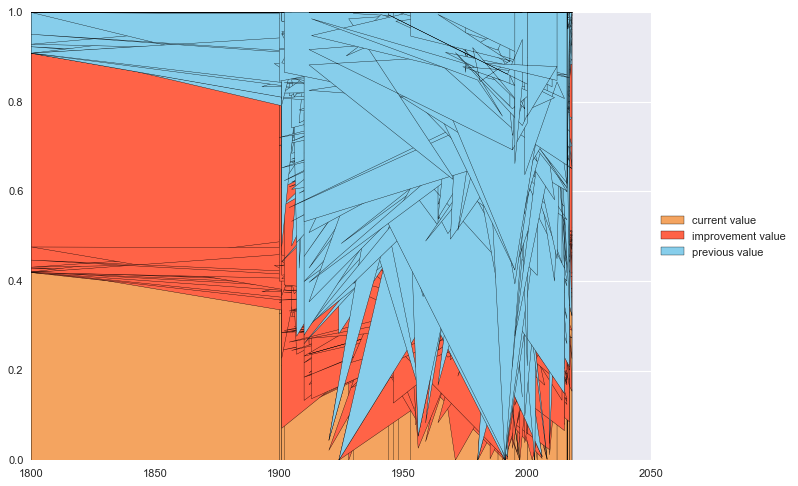

In [151]:
x = data['YEAR_BUILT']
y = data[['PREVIOUS_LAND_VALUE','CURRENT_LAND_VALUE','CURRENT_IMPROVEMENT_VALUE']]

y_perc = y.divide(y.sum(axis=1), axis=0)
plt.figure(figsize=(10,7))

# labels for each stack
labels = ['current value', 'improvement value', 'previous value']

# colors for each stack
colors = ['sandybrown', 'tomato', 'skyblue']

# Similar to pandas df.plot.area()
plt.stackplot(x, y_perc['PREVIOUS_LAND_VALUE'], y_perc['CURRENT_LAND_VALUE'], y_perc['CURRENT_IMPROVEMENT_VALUE'], labels=labels, colors=colors, edgecolor='black')

# Plots legend to the upperleft of Figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Pie Chart - pie
A pie chart is a circular statistical graphic which is divided into slices to illustrate numerical proportions. In a pie chart, the arc length of each slice is proportional to the quantity it represents.

**When to use**: Pie chart should be used seldom used as It is difficult to compare sections of the chart. Bar plot is used instead as comparing sections is easy.

**Note**: Pie Charts is not a good chart to illustrate information.

**Pie chart components**
* **wedges**: A list of Patch objects representing each wedge
* **texts**: List of Text objects representing the labels
* **autotexts**: List of Text objects for the numeric values - this is only availabe if the autopct value for the pie chart is not None

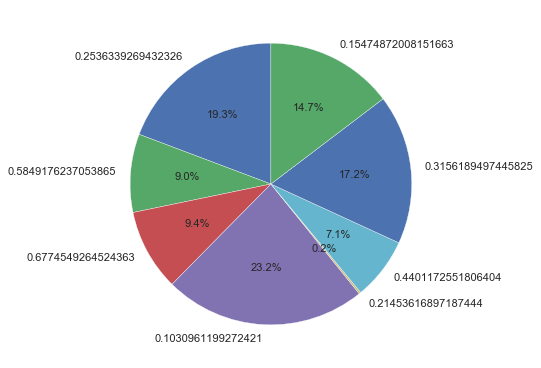

In [135]:
x = np.random.sample(8)
y = np.random.sample(8)
wedges, texts, autotexts = plt.pie(
    y,
    labels=x,
    startangle=90,
    #         shadow = True,
    # To display the percent value using Python string formatting.
    autopct='%1.1f%%')

**Pie chart customizations**

A pie chart can be easily customized and from above color and label values are formatted.
We set the values for the `colors` and `autopct` properties. The latters set the format for the value to be displays

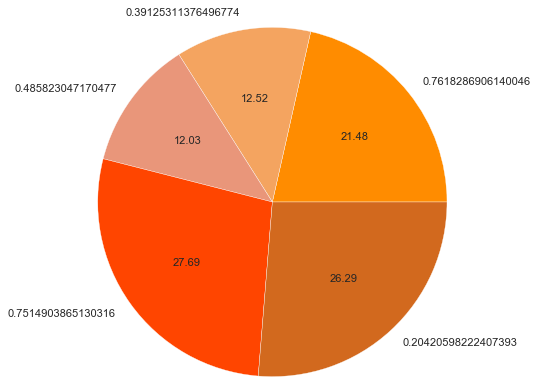

In [136]:
x = np.random.sample(5)
y = np.random.sample(5)

colors = ['darkorange', 'sandybrown', 'darksalmon', 'orangered', 'chocolate']
plt.pie(x, labels=y, colors=colors, autopct='%.2f')
plt.axis('equal')
plt.show()

**Explode property**

To highlight a particular wedge of the pie chart, we use explode to separate it from the rest of the chart.

The value for "explode" represents the fraction of the radius with which to offset each wedge

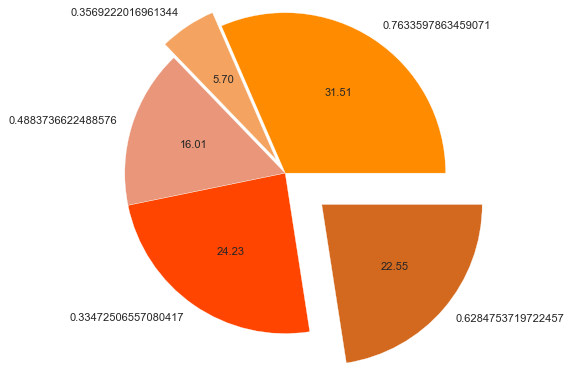

In [138]:
x = np.random.sample(5)
y = np.random.sample(5)

explode = (0, 0.1, 0, 0, 0.3)

colors = ['darkorange', 'sandybrown', 'darksalmon', 'orangered', 'chocolate']
plt.pie(x, labels=y, colors=colors, autopct='%.2f', explode=explode)
plt.axis('equal')
plt.show()

# 3D Plots
Due to the limitations of Jupyter Notebook, the interactive plots (3D and widget) do not work properly. Hence, the 2D plots are provided in a Jupyter Notebook and the 3D and widget plots are provided as .py files.

## 3D Plots as Subplots

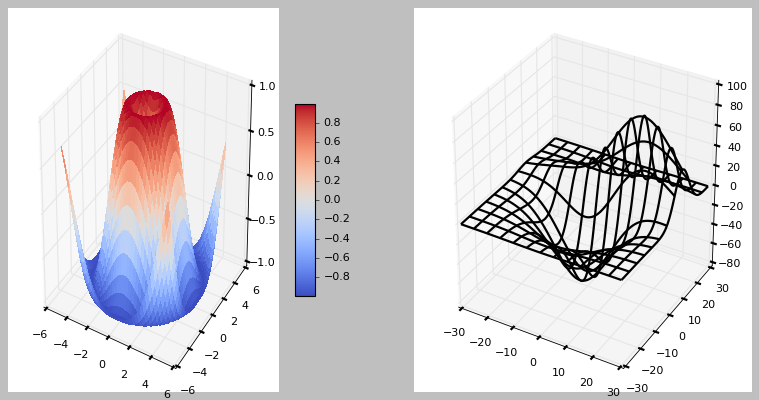

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import numpy as np

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
# Get equally spaced numbers with interval of 0.25 from -5 to 5
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
# Convert it into meshgrid for plotting purpose using x and y
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
# Return a tuple X, Y, Z with a test data set
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

## Contour Plot
Contour plots can be used for representing a 3D surface on a 2D format. Given a value for the Z-axis, lines are drawn for connecting the (x,y) coordinates where that particular z value occurs. Contour plots are generally used for continuous variables rather than categorical data.

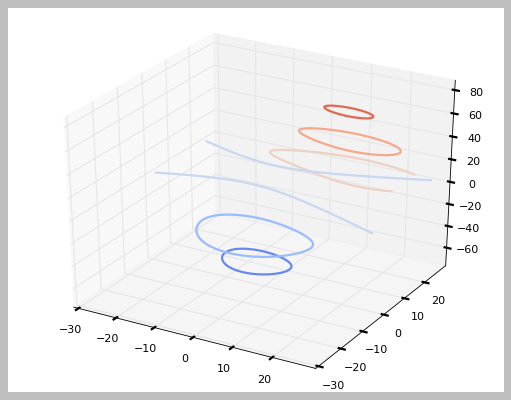

In [84]:
# Import libraries
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Get test data
X, Y, Z = axes3d.get_test_data(0.05)

# Plot contour curves
cset = ax.contour(X, Y, Z, cmap=cm.coolwarm)

# Set labels
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

## Contour Plot with Intensity

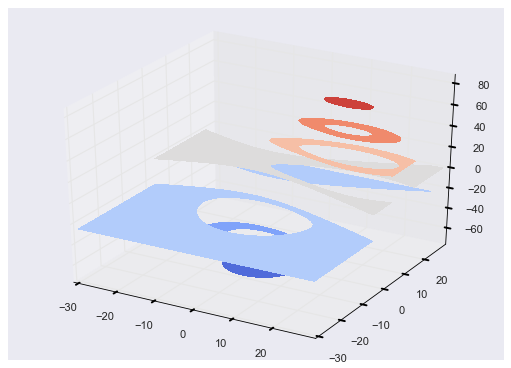

In [98]:
# Import libraries
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Get test data
X, Y, Z = axes3d.get_test_data(0.05)

# Plot contour curves
cset = ax.contourf(X, Y, Z, cmap=cm.coolwarm)

# Set labels
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

## Surface Plot
They show a functional relationship between a designated dependent variable (Y), and two independent variables (X and Z) rather than showing the individual data points. A practical application for the above plot would be to visualize how the Gradient Descent algorithm converges.

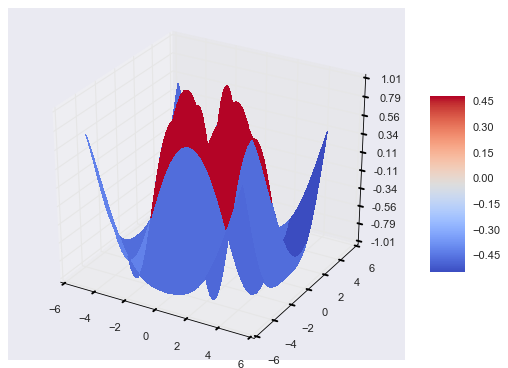

In [97]:
# Import libraries
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Create figures object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Triangular Surface Plot

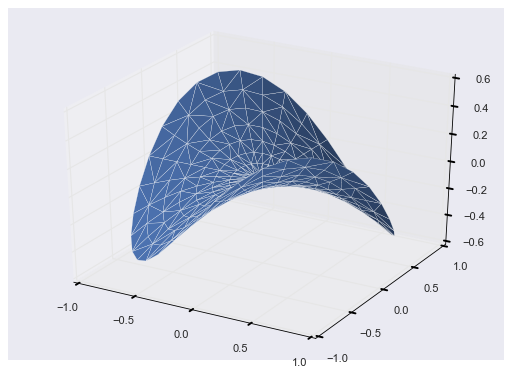

In [96]:
# Import libraries
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np

# Create figures object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Set parameters
n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

# Plot triangular meshed surface plot
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

## Polygon Plot

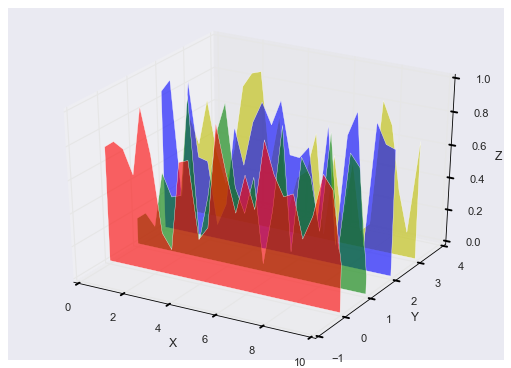

In [99]:
# Import libraries
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

def cc(arg):
    '''
    Shorthand to convert 'named' colors to rgba format at 60% opacity.
    '''
    return mcolors.to_rgba(arg, alpha=0.6)


def polygon_under_graph(xlist, ylist):
    '''
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    '''
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Make verts a list, verts[i] will be a list of (x,y) pairs defining polygon i
verts = []

# Set up the x sequence
xs = np.linspace(0., 10., 26)

# The ith polygon will appear on the plane y = zs[i]
zs = range(4)

for i in zs:
    ys = np.random.rand(len(xs))
    verts.append(polygon_under_graph(xs, ys))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'), cc('y')])
ax.add_collection3d(poly, zs=zs, zdir='y')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, 10)
ax.set_ylim(-1, 4)
ax.set_zlim(0, 1)

plt.show()

## Text Annotations in 3D

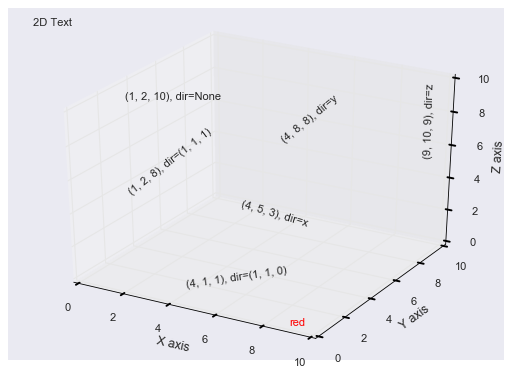

In [101]:
'''
======================
Text annotations in 3D
======================
Demonstrates the placement of text annotations on a 3D plot.
Functionality shown:
- Using the text function with three types of 'zdir' values: None,
  an axis name (ex. 'x'), or a direction tuple (ex. (1, 1, 0)).
- Using the text function with the color keyword.
- Using the text2D function to place text on a fixed position on the ax object.
'''
# Import libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Demo 1: zdir
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = (1, 4, 4, 9, 4, 1)
ys = (2, 5, 8, 10, 1, 2)
zs = (10, 3, 8, 9, 1, 8)

for zdir, x, y, z in zip(zdirs, xs, ys, zs):
    label = '(%d, %d, %d), dir=%s' % (x, y, z, zdir)
    ax.text(x, y, z, label, zdir)

# Demo 2: color
ax.text(9, 0, 0, "red", color='red')

# Demo 3: text2D
# Placement 0, 0 would be the bottom left, 1, 1 would be the top right.
ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)

# Tweaking display region and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

## 2D Data in 3D Plot

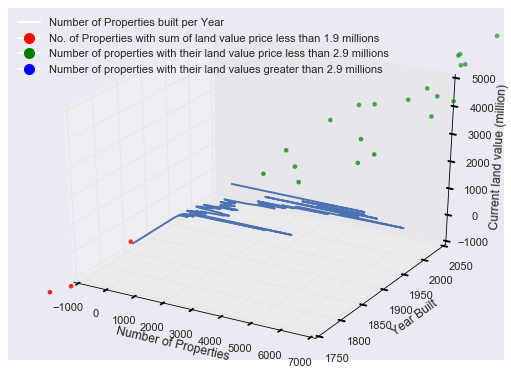

In [104]:
"""
=======================
Plot 2D data on 3D plot
=======================
Demonstrates using ax.plot's zdir keyword to plot 2D data on
selective axes of a 3D plot.
"""

# Import libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')

# Get the Property Tax Report dataset
# Dataset link: https://data.vancouver.ca/datacatalogue/propertyTax.htm
data = pd.read_csv('../dataset/property_tax_report_2018.csv')

# Extract the columns and do some transformations
yearWiseAgg = data[['PID','CURRENT_LAND_VALUE']].groupby(data['YEAR_BUILT']).agg({'PID':'count','CURRENT_LAND_VALUE':'sum'})
yearWiseAgg = yearWiseAgg.reset_index().dropna()

# Where zs takes either an array of the same length as xs and ys or a single value to place all points in the same plane 
# and zdir takes ‘x’, ‘y’ or ‘z’ as direction to use as z when plotting a 2D set.
ax.plot(yearWiseAgg['PID'],yearWiseAgg['YEAR_BUILT'], zs=0, zdir='z')

# Define colors as red, green, blue
colors = ['r', 'g', 'b']

# Get only records which have more than 2000 properties built per year
morethan2k = yearWiseAgg.query('PID>2000')

# Get shape of dataframe
dflen = morethan2k.shape[0]

# Fetch land values from dataframe
lanvalues = (morethan2k['CURRENT_LAND_VALUE']/2e6).tolist()

# Create a list of colors for each point corresponding to x and y
c_list = []
for i,value in enumerate(lanvalues):
    if value>0 and value<1900:
        c_list.append(colors[0])
    elif value>=1900 and value<2900:
        c_list.append(colors[1])
    else:
        c_list.append(colors[2])

# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(morethan2k['PID'], morethan2k['YEAR_BUILT'], zs=morethan2k['CURRENT_LAND_VALUE']/2e6, zdir='y',c=c_list)

# Create customized legends 
legend_elements = [Line2D([0], [0], lw=2, label='Number of Properties built per Year'),
                   Line2D([0], [0], marker='o', color='w', label='No. of Properties with sum of land value price less than 1.9 millions',markerfacecolor='r', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Number of properties with their land value price less than 2.9 millions',markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Number of properties with their land values greater than 2.9 millions',markerfacecolor='b', markersize=10)
                  ]
                   
# Make legend
ax.legend(handles=legend_elements, loc='best')

# Set labels according to axis
plt.xlabel('Number of Properties')
plt.ylabel('Year Built')
ax.set_zlabel('Current land value (million)')

plt.show()

# Widgets in Matplotlib
So far we have been dealing with static plots where the user can only visualize the charts or graphs without any interaction. However, widgets provide this level of interactivity to the user for better visualizing, filtering and comparing data.

## Checkbox widget
Matplotlib allows the user to customize which graph to show with the help of checkboxes. This can be particularly useful when there are many different categories making comparisons difficult. Hence, widgets make it easier to isolate and compare distinct graphs and reduce clutter.

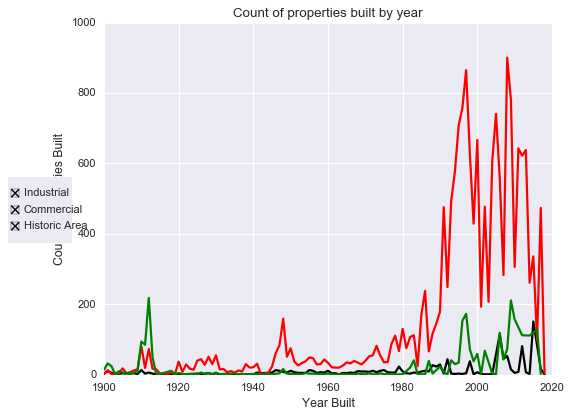

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
import pandas as pd

df = pd.read_csv("../dataset/property_tax_report_2018.csv")

# filter properties built on or after 1900
df_valid_year_built = df.loc[df['YEAR_BUILT'] >= 1900] 
# retrieve PID, YEAR_BUILT and ZONE_CATEGORY only
df1 = df_valid_year_built[['PID', 'YEAR_BUILT','ZONE_CATEGORY']]
# create 3 dataframes for 3 different zone categories
df_A = df1.loc[df1['ZONE_CATEGORY'] == 'Industrial']
df_B = df1.loc[df1['ZONE_CATEGORY'] == 'Commercial']
df_C = df1.loc[df1['ZONE_CATEGORY'] == 'Historic Area']
# retrieve the PID and YEAR_BUILT fields only
df_A = df_A[['PID','YEAR_BUILT']]
df_B = df_B[['PID','YEAR_BUILT']]
df_C = df_C[['PID','YEAR_BUILT']]
# Count the number of properties group by YEAR_BUILT
df2A = df_A.groupby(['YEAR_BUILT']).count()
df2B = df_B.groupby(['YEAR_BUILT']).count()
df2C = df_C.groupby(['YEAR_BUILT']).count()

# create line plots for each zone category 
fig, ax = plt.subplots()
l0, = ax.plot(df2A, lw=2, color='k', label='Industrial')
l1, = ax.plot(df2B, lw=2, color='r', label='Commercial')
l2, = ax.plot(df2C, lw=2, color='g', label='Historic Area')
# Adjusting the space around the figure
plt.subplots_adjust(left=0.2)
# Addinng title and labels
plt.title('Count of properties built by year')
plt.xlabel('Year Built')
plt.ylabel('Count of Properties Built')

#create a list for each zone category line plot
lines = [l0, l1, l2]

# make checkbuttons with all plotted lines with correct visibility
rax = plt.axes([0.05, 0.4, 0.1, 0.15])
# get the labels for each plot
labels = [str(line.get_label()) for line in lines]
# get the visibility for each plot
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)

# function to show the graphs based on checked labels
def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

# on click event call function to display graph
check.on_clicked(func)

plt.show()

## Slider widget to control the visual properties of plots
Matplotlib slider is very useful to visualize variations of parameters in graphs or mathematical equations. As you can see, the slider enables the user to change the values of the variables/parameters and view the change instantly.

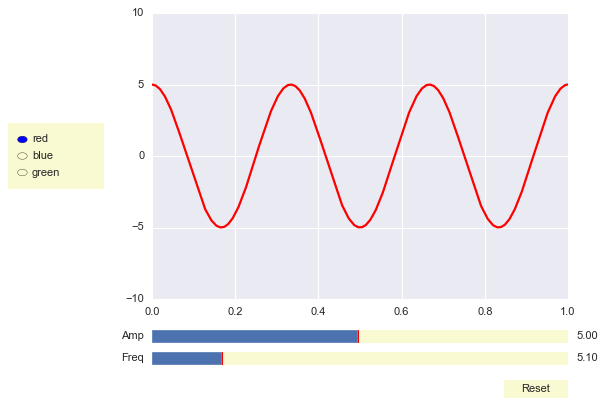

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

# configure subplot
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)

#set initial values of frequency and amplification
a0 = 5
f0 = 3
delta_f = 5.0
s = a0*np.cos(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')

# plot cosine curve
plt.axis([0, 1, -10, 10])

#configure axes
axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

# add slider for Frequency and Amplification
sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)

# function to update the graph when frequency or amplification is changed on the slider
def update(val):
	# get current amp value
    amp = samp.val
    # get current freq value
    freq = sfreq.val
    # plot cosine curve with updated values of amp and freq
    l.set_ydata(amp*np.cos(2*np.pi*freq*t))
    # redraw the figure
    fig.canvas.draw_idle()
# update slider frequency
sfreq.on_changed(update)
# update amp frequency
samp.on_changed(update)

# reset slider to original values when reset button is pressed 
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

# reset all variables
def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)

# function to change color of graph
def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
# change color when radio button is clicked
radio.on_clicked(colorfunc)

plt.show()

# Working with Images
Go ahead and confirm the image by displaying it using:

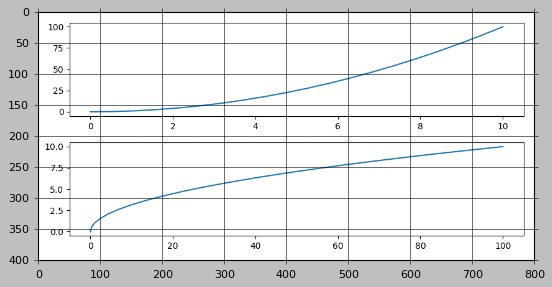

In [78]:
# # Importing matplotlib pyplot and image.
import matplotlib.image as mpimg

# Reading the image from the disk.
image = mpimg.imread('my_figure.png')

plt.imshow(image)

# Geographic Data with basemap
[Reference](https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html)

```bash
conda install basemap
conda install pillow

```

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

KeyError: 'PROJ_LIB'

In [14]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

NameError: name 'Basemap' is not defined

<Figure size 576x576 with 0 Axes>

The useful thing is that the globe shown here is not a mere image; it is a fully-functioning Matplotlib axes that understands spherical coordinates and which allows us to easily overplot data on the map! For example, we can use a different map projection, zoom-in to North America and plot the location of Seattle. We'll use an etopo image (which shows topographical features both on land and under the ocean) as the map background:

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

This gives you a brief glimpse into the sort of geographic visualizations that are possible with just a few lines of Python. We'll now discuss the features of Basemap in more depth, and provide several examples of visualizing map data. Using these brief examples as building blocks, you should be able to create nearly any map visualization that you desire.

# Example

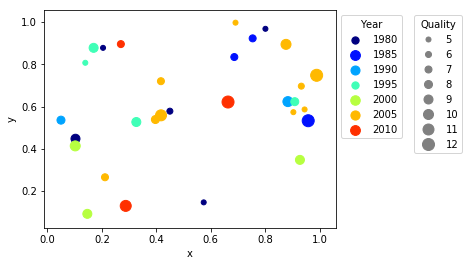

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(1)
import pandas as pd
plt.rcParams["figure.subplot.right"] = 0.8
v = np.random.rand(30,4)
v[:,2] = np.random.choice(np.arange(1980,2015,5), size=30)
v[:,3] = np.random.randint(5,13,size=30)

df= pd.DataFrame(v, columns=["x","y","year","quality"])
df.year = df.year.values.astype(int)
fig, ax = plt.subplots()
for i, (name, dff) in enumerate(df.groupby("year")):
    c = matplotlib.colors.to_hex(plt.cm.jet(i/7.))
    dff.plot(kind='scatter',x='x',y='y', label=name, c=c, 
             s=dff.quality**2, ax=ax)

leg = plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Year")
ax.add_artist(leg)
h = [plt.plot([],[], color="gray", marker="o", ms=i, ls="")[0] for i in range(5,13)]
plt.legend(handles=h, labels=range(5,13),bbox_to_anchor=(1.25, 1), loc='upper left', title="Quality")
plt.show()